In [2]:
## IMPORT 

import os
import numpy as  np
import pylab as plt
from scipy.signal import medfilt, butter, filtfilt
from scipy.stats import linregress
from scipy.optimize import curve_fit, minimize
from scipy.signal import resample
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py as h5
import h5py
from pathlib import Path
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simpson
from scipy.stats import pearsonr
import matplotlib.cm as cm
## SMOOTHING
from scipy.signal import savgol_filter
from scipy.stats import ttest_ind
import matplotlib as mpl


In [3]:
# Text   
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = '.SF Camera'

# Boxes
mpl.rcParams['axes.spines.top']= False
mpl.rcParams['axes.spines.right']= False

# plt.rcParams['figure.figsize'] = [4, 5]
plt.rcParams['figure.dpi'] = 140

In [ ]:
# directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/ADFCFP/female/ADFCfemales/processed'
directory = '/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/ADFCFP/firstbatch0524/processed'
# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Initialize list to store df
df = pd.DataFrame()

# Loop through each CSV, then concatenate them into a single df
for file in csv_files:
    single = pd.read_csv(file)
    df = pd.concat([df, single], axis=0, ignore_index=True)

df
/Users/ossamaghenissa/Desktop/FIJIplugins/

,Unnamed: 0,Time,Zscoreg,Zscorer,Freezing,Tone,Wn,ID,sex,day,trial,trial_type,time_vector
0,0,0.089059,0.607350,-0.106826,0.0,0,0,1052,F,day1,NaN,NaN,NaN
1,1,0.105727,0.607350,-0.106826,0.0,0,0,1052,F,day1,NaN,NaN,NaN
2,2,0.122396,0.607350,-0.106826,0.0,0,0,1052,F,day1,NaN,NaN,NaN
3,3,0.139064,0.607350,-0.106826,0.0,0,0,1052,F,day1,NaN,NaN,NaN
4,4,0.155733,0.607350,-0.106826,0.0,0,0,1052,F,day1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483850,115182,1920.082561,0.079982,0.589679,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483851,115183,1920.099230,0.054830,0.708807,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483852,115184,1920.115899,0.027859,0.942752,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483853,115185,1920.132569,0.006228,1.152736,0.0,0,0,855,f,day1,NaN,NaN,NaN


In [5]:
polyorder = 2  # Polynomial order
window_length = 41  # Window length: must be an odd number

# Group by ID and day, then apply the Savitzky-Golay filter
df['Zscoreg'] = df.groupby(['ID'])['Zscoreg'].transform(lambda x: savgol_filter(x, window_length, polyorder))

In [6]:
df['ID'].unique()

array([1052,  860, 1045,  858,  125,  859, 1050,  126, 1046,  129,  855,
         56,   53])

In [7]:
df['sex'] = df['sex'].replace({'F': 'f'})

In [8]:
# df = df[df['ID'].isin([129, 1045, 1046, 1050, 1051, 1052])]

## Behavior

       ID   day trialtype  trialnumber  freezing
0    1052  day1        Wn          1.0  0.000000
1    1052  day1        Wn          2.0  0.000000
2    1052  day1        Wn          3.0  0.000000
3    1052  day1        Wn          4.0  0.000000
4    1052  day1        Wn          5.0  1.466667
..    ...   ...       ...          ...       ...
307    53  day1      Tone          2.0  0.000000
308    53  day1      Tone          3.0  0.000000
309    53  day1      Tone          4.0  0.000000
310    53  day1      Tone          5.0  0.000000
311    53  day1      Tone          6.0  5.016667

[312 rows x 5 columns]
       ID   day trialtype  trialnumber  freezing
0    1052  day1        Wn          1.0  0.000000
1    1052  day1        Wn          2.0  0.000000
2    1052  day1        Wn          3.0  0.000000
3    1052  day1        Wn          4.0  0.000000
4    1052  day1        Wn          5.0  1.466667
..    ...   ...       ...          ...       ...
301    53  day1        Wn          2.0  0.000

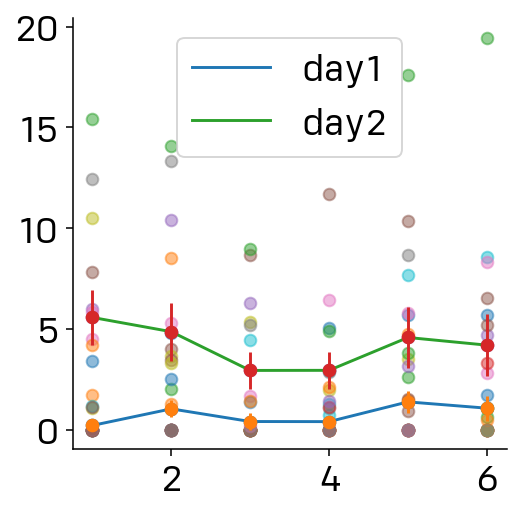

       ID   day trialtype  trialnumber  freezing
6    1052  day1      Tone          1.0  2.666667
7    1052  day1      Tone          2.0  0.000000
8    1052  day1      Tone          3.0  0.000000
9    1052  day1      Tone          4.0  0.000000
10   1052  day1      Tone          5.0  0.000000
..    ...   ...       ...          ...       ...
307    53  day1      Tone          2.0  0.000000
308    53  day1      Tone          3.0  0.000000
309    53  day1      Tone          4.0  0.000000
310    53  day1      Tone          5.0  0.000000
311    53  day1      Tone          6.0  5.016667

[78 rows x 5 columns]
day1 Tone
       ID   day trialtype  trialnumber   freezing
12   1052  day2      Tone          1.0  10.233333
13   1052  day2      Tone          2.0  11.066667
14   1052  day2      Tone          3.0  11.800000
15   1052  day2      Tone          4.0   8.783333
16   1052  day2      Tone          5.0  11.800000
..    ...   ...       ...          ...        ...
295    53  day2      Tone    

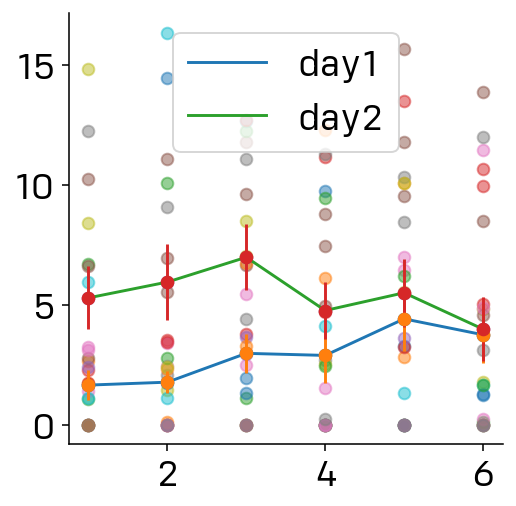

       ID   day trialtype  trialnumber  freezing
0    1052  day1        Wn          1.0  0.000000
1    1052  day1        Wn          2.0  0.000000
2    1052  day1        Wn          3.0  0.000000
3    1052  day1        Wn          4.0  0.000000
4    1052  day1        Wn          5.0  1.466667
..    ...   ...       ...          ...       ...
301    53  day1        Wn          2.0  0.000000
302    53  day1        Wn          3.0  0.000000
303    53  day1        Wn          4.0  0.000000
304    53  day1        Wn          5.0  0.000000
305    53  day1        Wn          6.0  0.000000

[78 rows x 5 columns]
day1 Wn
       ID   day trialtype  trialnumber  freezing
6    1052  day1      Tone          1.0  2.666667
7    1052  day1      Tone          2.0  0.000000
8    1052  day1      Tone          3.0  0.000000
9    1052  day1      Tone          4.0  0.000000
10   1052  day1      Tone          5.0  0.000000
..    ...   ...       ...          ...       ...
307    53  day1      Tone          2.0

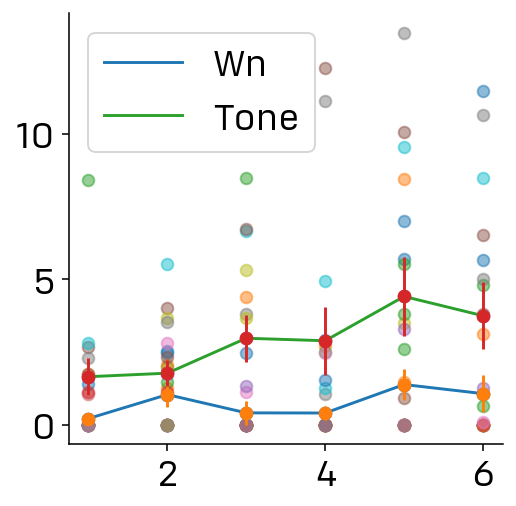

       ID   day trialtype  trialnumber   freezing
12   1052  day2      Tone          1.0  10.233333
13   1052  day2      Tone          2.0  11.066667
14   1052  day2      Tone          3.0  11.800000
15   1052  day2      Tone          4.0   8.783333
16   1052  day2      Tone          5.0  11.800000
..    ...   ...       ...          ...        ...
295    53  day2      Tone          2.0   0.000000
296    53  day2      Tone          3.0   0.000000
297    53  day2      Tone          4.0   0.250000
298    53  day2      Tone          5.0   0.000000
299    53  day2      Tone          6.0   0.000000

[78 rows x 5 columns]
day2 Tone
       ID   day trialtype  trialnumber   freezing
18   1052  day2        Wn          1.0   7.850000
19   1052  day2        Wn          2.0   3.483333
20   1052  day2        Wn          3.0   8.683333
21   1052  day2        Wn          4.0  11.716667
22   1052  day2        Wn          5.0  10.366667
..    ...   ...       ...          ...        ...
289    53  day2  

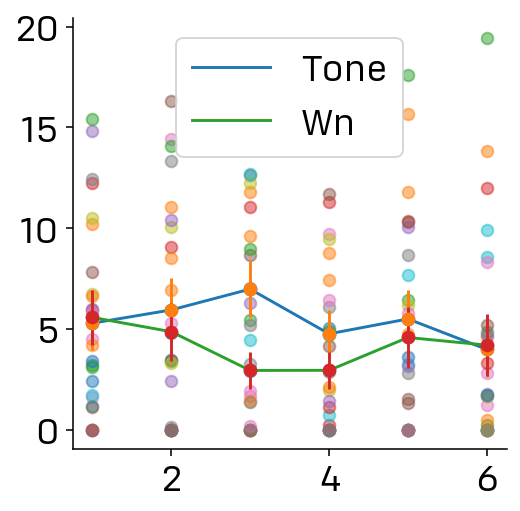

In [9]:
## Behavior 

behavior = {'ID':[], 'day':[], 'trialtype':[], 'trialnumber':[], 'freezing':[]}

behaviordf=df.copy()

behaviordf = behaviordf[(behaviordf['Tone'] == 1) | (behaviordf['Wn'] == 1)]
# df = df[(df['Tone'] == 1)]
# df = df[(df['Wn'] == 1)]


for mouse in behaviordf['ID'].unique():
    mouse_df = behaviordf[behaviordf['ID'] == mouse]
    for day in mouse_df['day'].unique():
        day_df = mouse_df[mouse_df['day'] == day]
        for trial_type in day_df['trial_type'].unique():
            trial_df = day_df[day_df['trial_type'] == trial_type]
            for trial in trial_df['trial'].unique():
                trial_tone = trial_df[trial_df['trial'] == trial]
                freezing = trial_tone[trial_tone['Freezing'] == 1].shape[0] / 60
                behavior['ID'].append(mouse)
                behavior['day'].append(day)
                behavior['trialnumber'].append(trial)
                behavior['trialtype'].append(trial_type)
                behavior['freezing'].append(freezing)



behavior_df = pd.DataFrame(behavior)
print(behavior_df)


# plotting

for trialtype in behavior_df['trialtype'].unique():
    trialtype_df = behavior_df[behavior_df['trialtype'] == trialtype]
    plt.figure(figsize=(4, 4))
    for day in trialtype_df['day'].unique():
        day_df = trialtype_df[trialtype_df['day'] == day]

        print(day_df)

        means = day_df.groupby('trialnumber')['freezing'].mean()
        sems = day_df.groupby('trialnumber')['freezing'].sem()

   
        print(day, trialtype)
        plt.scatter(means.index, means)
        plt.plot(means.index, means, label=f'{day}')
        plt.errorbar(means.index, means, yerr=sems, fmt='o')
        
        

        for mouse in day_df['ID'].unique():
            mouse_df = day_df[day_df['ID'] == mouse]
            plt.scatter(mouse_df['trialnumber'], mouse_df['freezing'], alpha=0.5)

        
    # plt.ylim(-1,15)
    plt.legend()

    plt.show()



for day in behavior_df['day'].unique():
    day_df = behavior_df[behavior_df['day'] == day]
    plt.figure(figsize=(4, 4))
    for trialtype in day_df['trialtype'].unique():
        trialtype_df = day_df[day_df['trialtype'] == trialtype]

        print(trialtype_df)

        means = trialtype_df.groupby('trialnumber')['freezing'].mean()
        sems = trialtype_df.groupby('trialnumber')['freezing'].sem()

   
        print(day, trialtype)
        plt.scatter(means.index, means)
        plt.plot(means.index, means, label=f'{trialtype}')
        plt.errorbar(means.index, means, yerr=sems, fmt='o')
        
        

        for mouse in trialtype_df['ID'].unique():
            mouse_df = trialtype_df[trialtype_df['ID'] == mouse]
            plt.scatter(mouse_df['trialnumber'], mouse_df['freezing'], alpha=0.5)

        
    # plt.ylim(-1,15)
    plt.legend()

    plt.show()

In [10]:
####Smoothing 
polyorder = 2  # Polynomial order
window_length = 51  # Window length: must be an odd number

# Apply the filter
df['Zscoreg'] = savgol_filter(df['Zscoreg'], window_length, polyorder)

In [11]:
# MAKE ALL THE TRIALS HAVE THE SAME BASELINE (0) -- corrects for decrease in signal through time -- might be biologically relevant though
# so use it only if needed (PETH for example)
# Loop through each unique Mouse ID

for mouse_id in df['ID'].unique():
    # Filter for the current mouse
    mouse_data = df[df['ID'] == mouse_id]

    # Loop through each day for the current mouse
    for day in mouse_data['day'].unique():
        # Filter for the current day
        day_data = mouse_data[mouse_data['day'] == day]

        # Loop through each trial_type for the current day
        for trial_type in day_data['trial_type'].unique():
            # Filter for the current trial type
            trial_type_data = day_data[day_data['trial_type'] == trial_type]

            # Loop through each trial for the current trial type
            for trial_num in trial_type_data['trial'].unique():
                # Filter for the current trial
                trial_data = trial_type_data[trial_type_data['trial'] == trial_num]

                # Identify pre-tone period (first 5 seconds)
                pre_tone_data = trial_data[trial_data['time_vector'] < 0]  # Pre-tone corresponds to time < 0

                # Compute the mean Z-score for the pre-tone period
                pre_tone_mean = pre_tone_data['Zscoreg'].mean()

                # Subtract the pre-tone mean from the entire trial's Z-score
                df.loc[trial_data.index, 'Zscoreg'] -= pre_tone_mean


df 

,Unnamed: 0,Time,Zscoreg,Zscorer,Freezing,Tone,Wn,ID,sex,day,trial,trial_type,time_vector
0,0,0.089059,0.607350,-0.106826,0.0,0,0,1052,f,day1,NaN,NaN,NaN
1,1,0.105727,0.607350,-0.106826,0.0,0,0,1052,f,day1,NaN,NaN,NaN
2,2,0.122396,0.607350,-0.106826,0.0,0,0,1052,f,day1,NaN,NaN,NaN
3,3,0.139064,0.607350,-0.106826,0.0,0,0,1052,f,day1,NaN,NaN,NaN
4,4,0.155733,0.607350,-0.106826,0.0,0,0,1052,f,day1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483850,115182,1920.082561,0.236777,0.589679,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483851,115183,1920.099230,0.195445,0.708807,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483852,115184,1920.115899,0.152099,0.942752,0.0,0,0,855,f,day1,NaN,NaN,NaN
2483853,115185,1920.132569,0.106739,1.152736,0.0,0,0,855,f,day1,NaN,NaN,NaN


In [12]:
##### DROP ALL THE UNNECESSARY SHIT 

df = df.dropna(subset=['trial']).reset_index(drop=True)
df = df.drop(df.loc[(df['ID'] == 53) & (df['day'] == 'day2') & (df['trial_type'] == 'Tone') & (df['trial'] == 6)].index)
df = df.drop(df.loc[(df['ID'] == 56) & (df['day'] == 'day2') & (df['trial_type'] == 'Tone') & (df['trial'] == 6)].index)
# df = df.drop(df.loc[df['trial'] == 1].index)


# df = df.drop(df.loc[(df['ID'] == 53) | (df['ID'] == 56)].index)
df


,Unnamed: 0,Time,Zscoreg,Zscorer,Freezing,Tone,Wn,ID,sex,day,trial,trial_type,time_vector
0,6897,115.051341,0.487846,-0.470431,0.0,0,0,1052,f,day1,1.0,Wn,-5.000000
1,6898,115.068009,0.496047,-0.736025,0.0,0,0,1052,f,day1,1.0,Wn,-4.983333
2,6899,115.084677,0.503953,-0.396037,0.0,0,0,1052,f,day1,1.0,Wn,-4.966667
3,6900,115.101346,0.511551,0.021376,0.0,0,0,1052,f,day1,1.0,Wn,-4.950000
4,6901,115.118014,0.518833,-0.029376,0.0,0,0,1052,f,day1,1.0,Wn,-4.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654283,108617,1810.649431,0.013081,1.033820,0.0,0,0,855,f,day1,6.0,Tone,29.933333
654284,108618,1810.666100,0.009974,1.073734,0.0,0,0,855,f,day1,6.0,Tone,29.950000
654285,108619,1810.682769,0.006566,1.052302,0.0,0,0,855,f,day1,6.0,Tone,29.966667
654286,108620,1810.699438,0.002808,1.053345,0.0,0,0,855,f,day1,6.0,Tone,29.983333


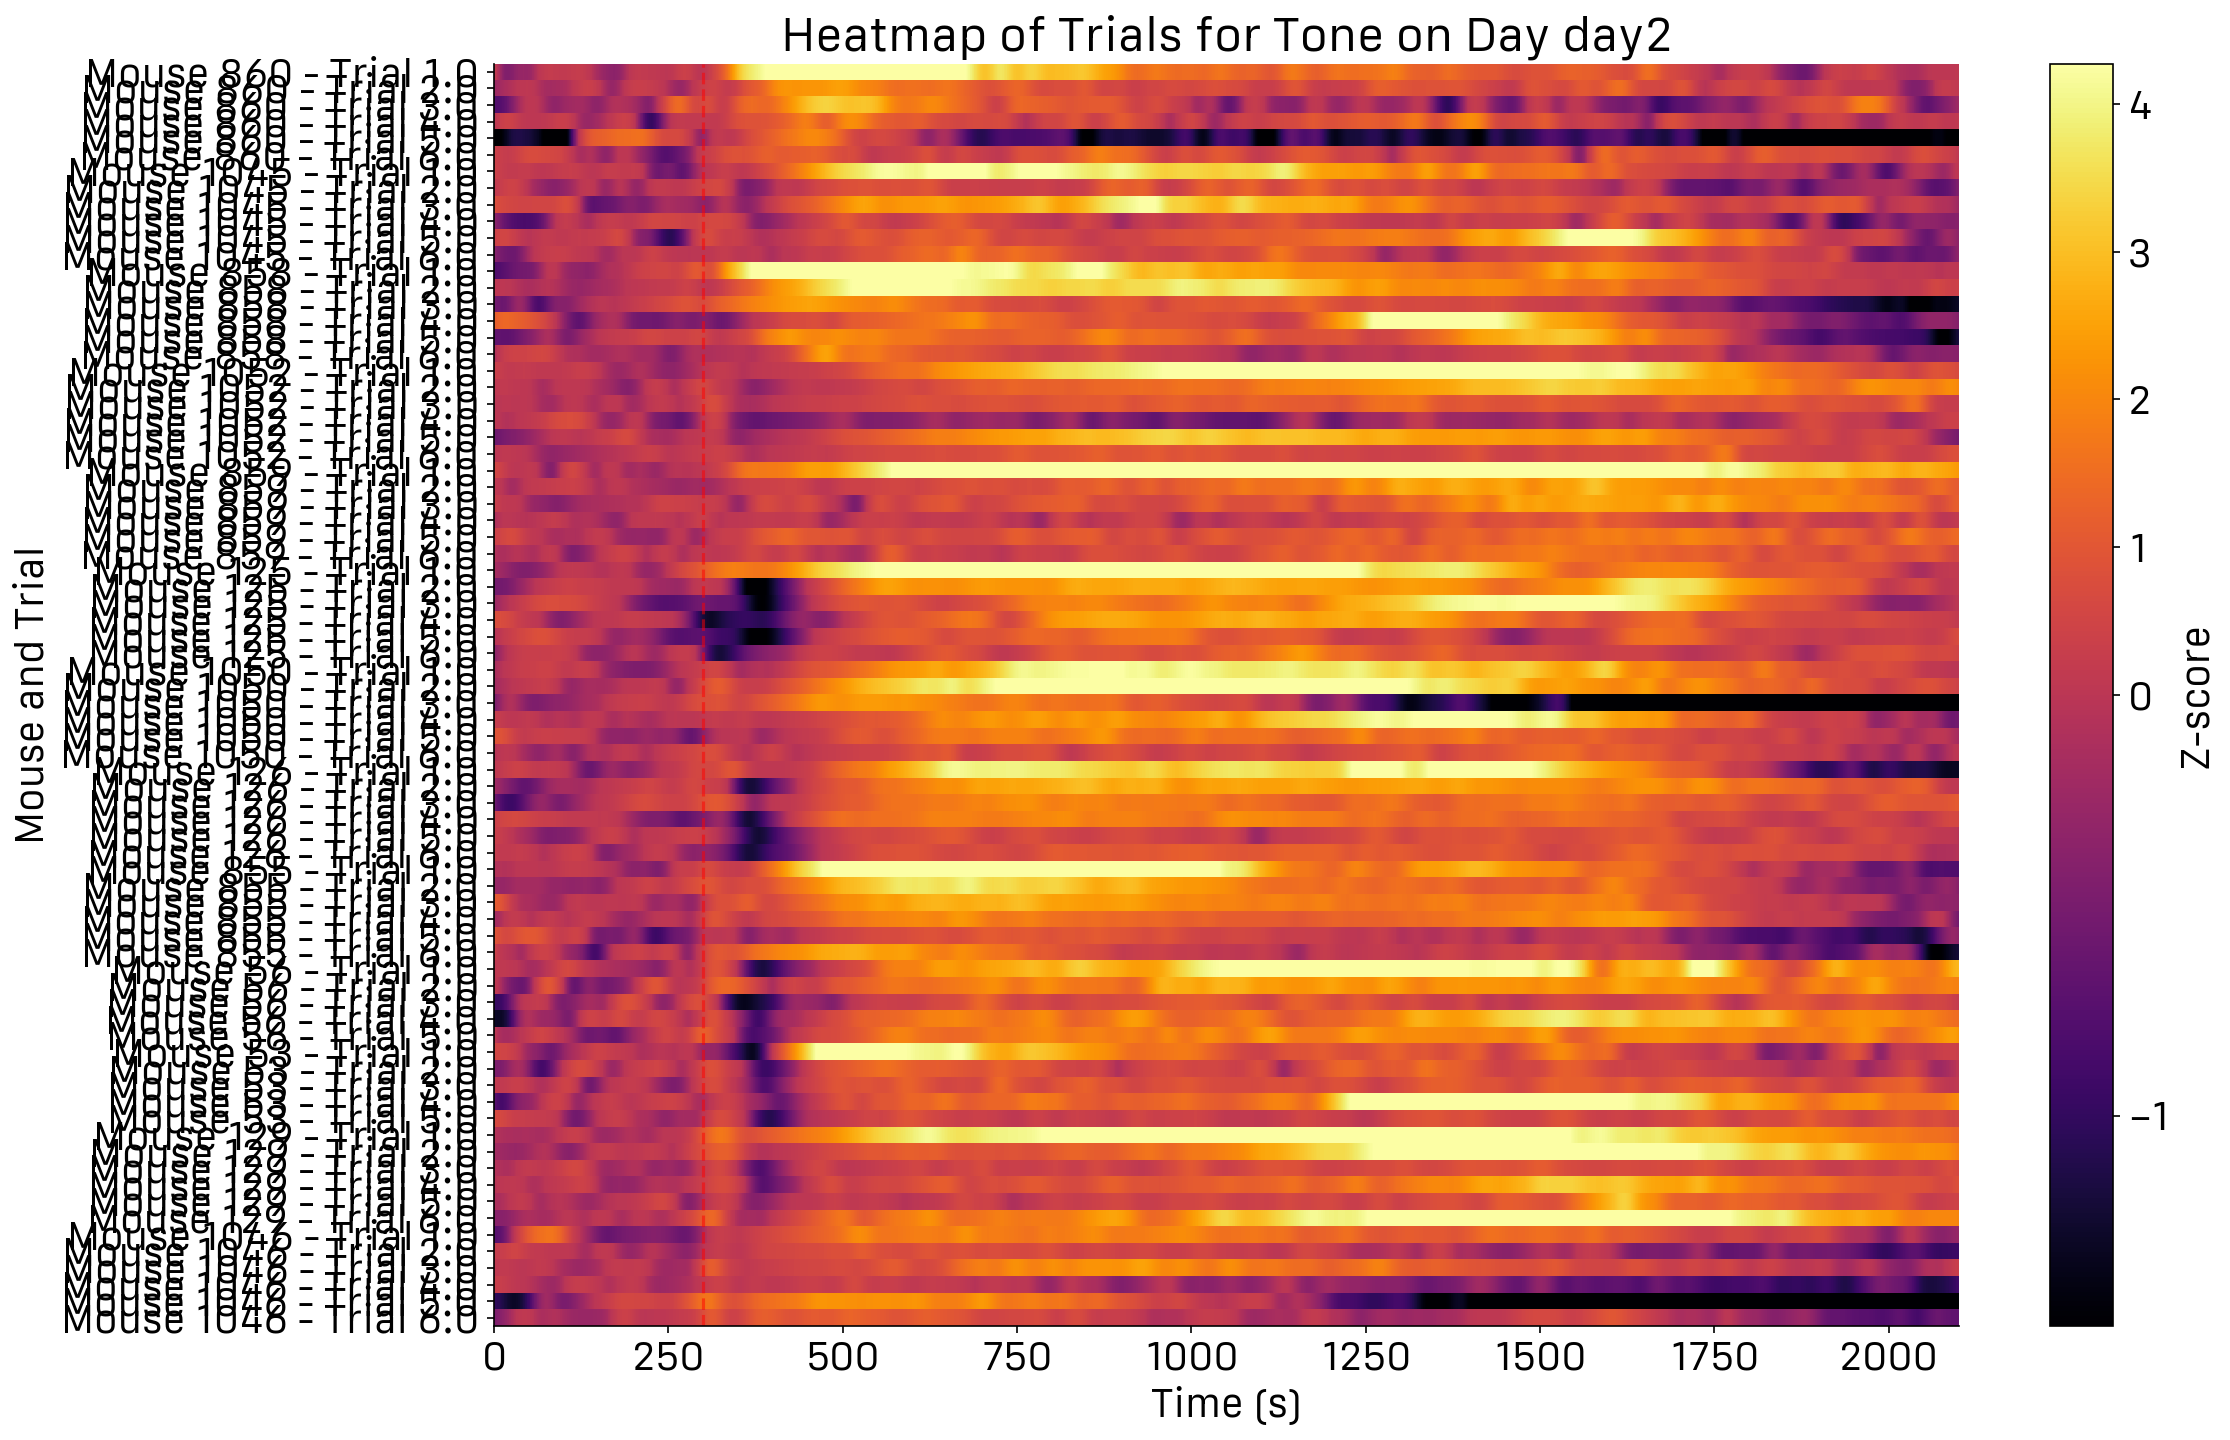

In [13]:
####### HEATMAP 

def generate_heatmap_for_trials(df, day, trial_type):
    # Filter data for the specified trial type and day
    filtered_df = df[(df['trial_type'] == trial_type) & (df['day'] == day)]

    # Initialize a list to store Z-score data for heatmap
    trials_list = []
    y_labels = []  # To store labels for each row in the heatmap

    # Loop through each unique mouse for the specified day and trial type
    for mouse in filtered_df['ID'].unique():
        mouse_data = filtered_df[filtered_df['ID'] == mouse]
        
        # Loop through each unique trial for the current mouse, sorted by trial number
        for trial in sorted(mouse_data['trial'].unique()):
            trial_data = mouse_data[mouse_data['trial'] == trial]
            trials_list.append(trial_data['Zscoreg'].values)  # Collect Z-score data for each trial
            y_labels.append(f'Mouse {mouse} - Trial {trial}')  # Create a label for each trial



    # Convert the list of arrays to a 2D numpy array for heatmap
    trials_array = np.array(trials_list)

    time_vector = trial_data['time_vector'].values  # Take from the last trial_data

    # # Get the time vector (assumes the time vector is consistent across trials)

    # Calculate the percentile of the maximum Z-score for scaling
    max_value = np.percentile(np.abs(trials_array), 95)

    # Create a custom normalization to map white to 0
    norm = mcolors.TwoSlopeNorm(vmin=-1.5, vcenter=0, vmax=max_value)

    # Increase figure size and DPI for better clarity
    plt.figure(figsize=(16, 10), dpi=150)
    heatmap = plt.imshow(trials_array, aspect='auto', cmap='inferno', origin='upper', norm=norm, interpolation='none')

    # Add colorbar
    cbar = plt.colorbar(heatmap, label='Z-score')

    # Label x-axis and y-axis
    plt.xlabel('Time (s)')
    plt.ylabel('Mouse and Trial')

    # # Set x-ticks to correspond to the time vector
    # plt.xticks(np.arange(len(time_vector)), labels=np.round(time_vector, 2), rotation=45)

    # Set y-ticks to correspond to mouse and trial labels
    plt.yticks(np.arange(len(trials_array)), labels=y_labels)

    # Mark the onset point (time = 0) with a vertical line
    onset_index = np.where(time_vector == 0)[0]
    if onset_index.size > 0:
        plt.axvline(x=onset_index[0], color='red', alpha=0.5, linestyle='--', label='Onset')

    # Add title for clarity
    plt.title(f'Heatmap of Trials for {trial_type} on Day {day}')
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to make it clearer
    plt.show()

# Example usage
generate_heatmap_for_trials(df, day='day2', trial_type='Tone')

In [14]:
# #### SINGLE TRIAL ANALYSIS 

# def plot_trials(df, trial_type_column):
#     # Loop through each mouse
#     for mouse in df['ID'].unique():
#         # Loop through each day
#         for day in df['day'].unique():
#             # Filter data for the specific mouse and day
#             mouse_data = df[(df['ID'] == mouse) & (df['day'] == day)]

#             # Loop through each unique trial type within the specific mouse and day
#             for trial_type in mouse_data[trial_type_column].unique():
#                 # Filter data for the specific trial type
#                 trial_type_data = mouse_data[mouse_data[trial_type_column] == trial_type]

#                 # Create a new figure for each unique combination of mouse, day, and trial type
#                 plt.figure(figsize=(10, 6))

#                 # Plot each trial within the trial type
#                 for trial in trial_type_data['trial'].unique():
#                     trial_data = trial_type_data[trial_type_data['trial'] == trial]

#                     # Plot Z-score signal for the trial
#                     plt.plot(trial_data['time_vector'], trial_data['Zscoreg'], label=f'Trial {trial}')

#                 # Add labels, title, and legend for each plot
#                 plt.xlabel('Time (s)')
#                 plt.ylabel('Zscore')
#                 plt.title(f'Mouse {mouse}, Day {day}, Trial Type: {trial_type}')
#                 plt.axvline(x=0, color='gray', linestyle='--', label='Onset')
#                 plt.legend()

#                 # Display the combined plot for each mouse, day, and trial type
#                 plt.show()

# # Example usage
# plot_trials(df, 'trial_type')



In [15]:
# ####plot PETH for events you want -- dependent on the bounds of trials you put before 

# def plot_psth(df, day, trial_type):
#     mouse_average = []

#     # Loop through each mouse and plot their individual average
#     for mouse in df['ID'].unique():
#         mice = df.loc[(df['ID'] == mouse) & (df['day'] == day) & (df['trial'] > 0) & (df['trial_type'] == trial_type)]

#         # Group by 'time_vector' and calculate the mean Z-score for each time point
#         zscore_id = mice.groupby('time_vector')['Zscoreg'].mean()

#         # Plot individual mouse average trace
#         plt.plot(zscore_id.index, zscore_id, alpha=0.5, color='gray')#, label=f'Mouse {mouse}'

#         mouse_average.append(zscore_id)

#     # Convert list of individual averages into a DataFrame
#     mouse_average_df = pd.DataFrame(mouse_average)

#     # Calculate the mean and SEM across all mice
#     mean_across_mice = mouse_average_df.mean(axis=0)
#     sem_across_mice = mouse_average_df.sem(axis=0)

#     # Plot the mean across all mice with SEM
#     plt.plot(mean_across_mice.index, mean_across_mice, color='black', linewidth=2, label='Mean Across Mice')
#     plt.fill_between(mean_across_mice.index, mean_across_mice - sem_across_mice, 
#                      mean_across_mice + sem_across_mice, color='gray', alpha=0.3, label='SEM')

#     # Add labels and legend
#     plt.xlabel('Time (s)')
#     plt.ylabel('Zscore')
#     plt.title(f'Zscored Signal aligned on {trial_type} Onset ({day})')
#     plt.axvline(x=0, color='gray', alpha=0.3, linestyle='--', label='Tone Onset')
#     plt.legend()

#     # # Add additional visual elements based on day
#     # if day == 'day1':
#     #     plt.axvspan(18, 20, color='yellow', alpha=0.3, label='FS onset')
#     #     plt.axvspan(0, 18, color='gray', alpha=0.1)  # Shaded region for tone period
#     # else:
#     # plt.axvspan(0, 20, color='gray', alpha=0.1)  # Shaded region for tone period

#     # Show the plot
#     plt.show()
#     return(mouse_average_df)

# plot_psth(df, 'day1', 'Tone')

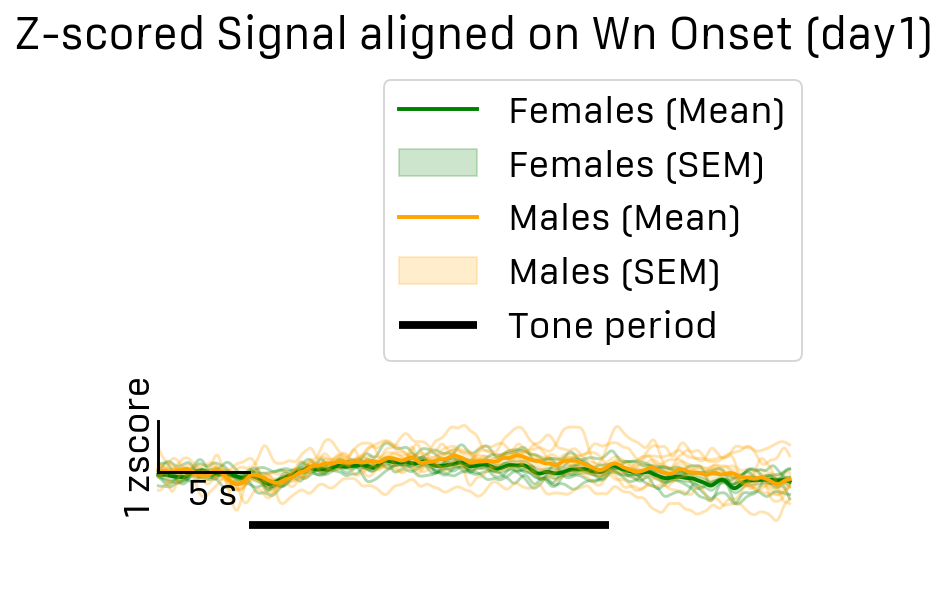

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_psth(df, day, trial_type):
    # Create a dictionary to store color codes for males and females
    sex_colors = {'f': 'green', 'm': 'orange'}
    sex_labels = {'f': 'Females', 'm': 'Males'}

    # Loop through each sex ('f' and 'm') and plot separately
    for sex, sex_group in df.groupby('sex'):
        mouse_average = []

        # Loop through each mouse in the sex group
        for mouse in sex_group['ID'].unique():
            mice = sex_group.loc[
                (sex_group['ID'] == mouse) & 
                (sex_group['day'] == day) & 
                (sex_group['trial'] > 0) & 
                (sex_group['trial_type'] == trial_type)
            ]

            # Group by 'time_vector' and calculate the mean Z-score for each time point
            zscore_id = mice.groupby('time_vector')['Zscoreg'].mean()

            # Plot individual mouse average trace
            plt.plot(zscore_id.index, zscore_id, alpha=0.3, color=sex_colors[sex])

            mouse_average.append(zscore_id)

        # Convert list of individual averages into a DataFrame
        mouse_average_df = pd.DataFrame(mouse_average)

        # Calculate the mean and SEM across all mice for the current sex
        mean_across_mice = mouse_average_df.mean(axis=0)
        sem_across_mice = mouse_average_df.sem(axis=0)

        # Plot the mean across all mice with SEM for the current sex
        plt.plot(mean_across_mice.index, mean_across_mice, color=sex_colors[sex], linewidth=2, label=f'{sex_labels[sex]} (Mean)')
        plt.fill_between(
            mean_across_mice.index, 
            mean_across_mice - sem_across_mice, 
            mean_across_mice + sem_across_mice, 
            color=sex_colors[sex], 
            alpha=0.2, 
            label=f'{sex_labels[sex]} (SEM)'
        )

    # Add event markers and annotations based on day and trial_type
    y_min, y_max = plt.gca().get_ylim()
    if day == 'day1' and trial_type == 'Tone':
        plt.hlines(y_min, 18, 20, color='orange', linewidth=4, label='FS onset')
        plt.hlines(y_min, 0, 18, color='black', linewidth=4, label='Tone period')
    else:
        plt.hlines(y_min, 0, 20, color='black', linewidth=4, label='Tone period')

    # Add labels, legend, and styling
    plt.xlabel('Time (s)')
    plt.ylabel('Z-score')
    plt.title(f'Z-scored Signal aligned on {trial_type} Onset ({day})')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_visible(False)

    scale_x_pos = mean_across_mice.index[0]
    plt.plot([scale_x_pos, scale_x_pos], [y_max, y_max - 1], color='black', linewidth=1.5)
    plt.text(scale_x_pos - 1, y_max - 0.5, '1 zscore', ha='center', va='center', rotation='vertical')
    plt.plot([-5, 0], [y_max - 1, y_max - 1], color='black', linewidth=1.5)
    plt.text(-2, y_max - 1.1, '5 s', ha='center', va='top')
    plt.ylim(-2,8)

    plt.legend()
    plt.show()

plot_psth(df, 'day1', 'Wn')


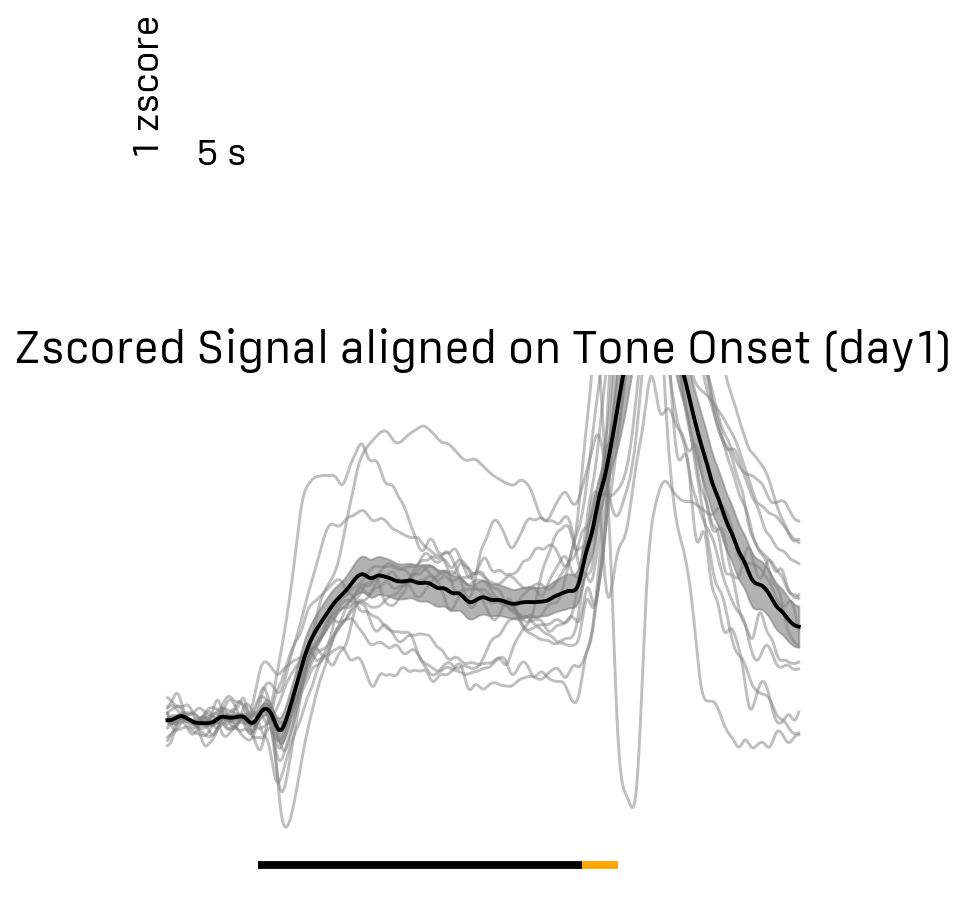

time_vector,-5.000000,-4.983333,-4.966667,-4.950000,-4.933333,-4.916667,-4.900000,-4.883333,-4.866667,-4.850000,...,29.850000,29.866667,29.883333,29.900000,29.916667,29.933333,29.950000,29.966667,29.983333,30.000000
Zscoreg,-0.204366,-0.201635,-0.198783,-0.195840,-0.192829,-0.189770,-0.186677,-0.183568,-0.180453,-0.177328,...,2.313236,2.310934,2.308896,2.307127,2.305624,2.304377,2.303377,2.302617,2.302092,2.301793
Zscoreg,-0.242753,-0.238225,-0.233560,-0.228733,-0.223704,-0.218454,-0.213001,-0.207375,-0.201587,-0.195629,...,-0.185694,-0.183497,-0.181639,-0.180127,-0.178973,-0.178163,-0.177653,-0.177380,-0.177288,-0.177351
Zscoreg,-0.097974,-0.093174,-0.088440,-0.083833,-0.079427,-0.075294,-0.071471,-0.067959,-0.064736,-0.061776,...,0.877930,0.874390,0.871030,0.867785,0.864586,0.861396,0.858226,0.855115,0.852099,0.849204
Zscoreg,0.072641,0.061137,0.049996,0.039322,0.029200,0.019678,0.010758,0.002424,-0.005329,-0.012479,...,0.008433,0.014595,0.021649,0.029531,0.038126,0.047291,0.056893,0.066831,0.077025,0.087367
Zscoreg,0.253641,0.251536,0.249160,0.246571,0.243790,0.240809,0.237633,0.234294,0.230831,0.227257,...,2.085923,2.085303,2.084892,2.084679,2.084649,2.084800,2.085151,2.085712,2.086478,2.087431
Zscoreg,-0.000248,0.003227,0.006741,0.010289,0.013858,0.017424,0.020968,0.024473,0.027900,0.031182,...,0.653252,0.654551,0.656040,0.657665,0.659335,0.660957,0.662462,0.663809,0.664967,0.665901
Zscoreg,0.134608,0.137352,0.140116,0.142870,0.145584,0.148222,0.150746,0.153119,0.155310,0.157284,...,1.436608,1.434108,1.431301,1.428208,1.424857,1.421261,1.417423,1.413342,1.409038,1.404557
Zscoreg,-0.302575,-0.301818,-0.300456,-0.298474,-0.295882,-0.292697,-0.288909,-0.284496,-0.279464,-0.273868,...,1.187116,1.169981,1.152784,1.135620,1.118568,1.101711,1.085145,1.068984,1.053340,1.038320
Zscoreg,0.069880,0.060890,0.051524,0.041817,0.031811,0.021565,0.011144,0.000624,-0.009910,-0.020370,...,1.828764,1.826748,1.824669,1.822531,1.820341,1.818109,1.815844,1.813551,1.811227,1.808877
Zscoreg,-0.014583,-0.014849,-0.015504,-0.016512,-0.017827,-0.019401,-0.021181,-0.023112,-0.025141,-0.027221,...,2.067144,2.066724,2.066094,2.065184,2.063944,2.062339,2.060348,2.057961,2.055178,2.052004


In [32]:
####plot PETH for events you want -- dependent on the bounds of trials you put before 

def plot_psth(df, day, trial_type):
    mouse_average = []

    # Loop through each mouse and plot their individual average
    for mouse in df['ID'].unique():
        mice = df.loc[(df['ID'] == mouse) & (df['day'] == day) & (df['trial'] > 0) & (df['trial_type'] == trial_type)]

        # Group by 'time_vector' and calculate the mean Z-score for each time point
        zscore_id = mice.groupby('time_vector')['Zscoreg'].mean()

        # Plot individual mouse average trace
        plt.plot(zscore_id.index, zscore_id, alpha=0.5, color='gray')#, label=f'Mouse {mouse}'

        mouse_average.append(zscore_id)

    # Convert list of individual averages into a DataFrame
    mouse_average_df = pd.DataFrame(mouse_average)

    # Calculate the mean and SEM across all mice
    mean_across_mice = mouse_average_df.mean(axis=0)
    sem_across_mice = mouse_average_df.sem(axis=0)

    # Plot the mean across all mice with SEM
    plt.plot(mean_across_mice.index, mean_across_mice, color='black', linewidth=2, label='Mean Across Mice')
    plt.fill_between(mean_across_mice.index, mean_across_mice - sem_across_mice, 
                     mean_across_mice + sem_across_mice, color='gray', alpha=0.6, label='SEM')
    
    #     # Add additional visual elements based on day
    # if day == 'day1' and trial_type=='Tone':
    #     plt.axvspan(18, 20, color='yellow', alpha=0.3, label='FS onset')
    #     plt.axvspan(0, 18, color='gray', alpha=0.1)  # Shaded region for tone period
    # else:
    #     plt.axvspan(0, 20, color='gray', alpha=0.1)  # Shaded region for tone period


 # Add horizontal lines instead of fill_betweenx
    y_min, y_max = plt.gca().get_ylim()  # Get current y-axis limits

    if day == 'day1' and trial_type == 'Tone':
        plt.hlines(y_min, 18, 20, color='orange', linewidth=4, label='FS onset')  # Horizontal line for FS onset
        plt.hlines(y_min, 0, 18, color='black', linewidth=4, label='Tone period')  # Horizontal line for tone period
    else:
        plt.hlines(y_min, 0, 20, color='black', linewidth=4, label='Tone period')  # Horizontal line for tone period

    # Add labels and legend

    plt.xlabel('Time (s)')
    plt.ylabel('Zscore')
    plt.title(f'Zscored Signal aligned on {trial_type} Onset ({day})')
    # plt.axvline(x=0, color='gray', alpha=0.9, linestyle='--', label='Tone Onset')
    # plt.plot([0, 0], [0, y_max], color='gray', alpha=0.9, linestyle='--', label='Tone Onset')
    # plt.legend()

    ### drop the spines (frame)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)


    #drop the y axis
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_visible(False)

    # plt.axhline(0, color='grey', linestyle='-', alpha=0.5)

# Add the custom vertical scale line with "1 Z-score" label
    scale_x_pos = mean_across_mice.index[0]  # Position to the left of the plot
    plt.plot([scale_x_pos, scale_x_pos], [y_max, y_max-1], color='black', linewidth=1.5)
    plt.text(scale_x_pos - 1 , y_max-0.5, '1 zscore', ha='center', va='center', rotation='vertical')

    plt.plot([-5, 0], [y_max-1, y_max-1], color='black', linewidth=1.5)  # Horizontal line at y=0
    plt.text(-2, y_max-1.1, '5 s', ha='center', va='top')
    plt.ylim(-2,4)

    # Show the plot
    plt.show()
    return(mouse_average_df)



plot_psth(df, 'day1', 'Tone')

time_vector
-5.000000    -0.011046
-4.983333    -0.011426
-4.966667    -0.011962
-4.950000    -0.012570
-4.933333    -0.013166
                ...   
 29.933333   -0.281274
 29.950000   -0.282878
 29.966667   -0.284410
 29.983333   -0.285855
 30.000000   -0.287196
Name: Zscoreg, Length: 2101, dtype: float64
time_vector
-5.000000     0.073485
-4.983333     0.072288
-4.966667     0.071488
-4.950000     0.071052
-4.933333     0.070933
                ...   
 29.933333   -0.223206
 29.950000   -0.221866
 29.966667   -0.220438
 29.983333   -0.218974
 30.000000   -0.217525
Name: Zscoreg, Length: 2101, dtype: float64
time_vector
-5.000000     0.013095
-4.983333     0.014851
-4.966667     0.016441
-4.950000     0.017861
-4.933333     0.019119
                ...   
 29.933333   -0.552277
 29.950000   -0.549836
 29.966667   -0.547456
 29.983333   -0.545113
 30.000000   -0.542787
Name: Zscoreg, Length: 2101, dtype: float64
time_vector
-5.000000    -0.030375
-4.983333    -0.034619
-4.966667    -0

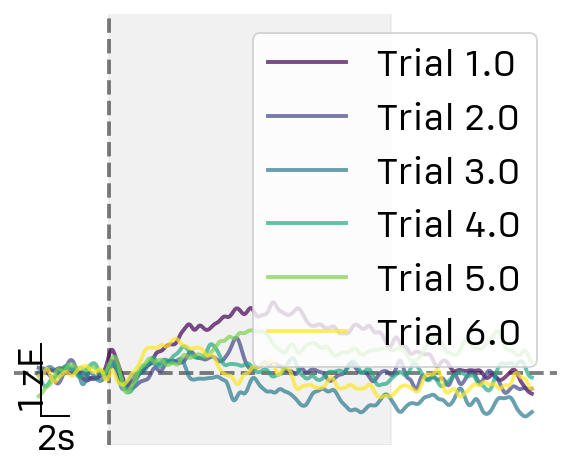

In [18]:
####plot PETH with 1 trace per tone 


def plot_psth(df, day, trial_type):

    df = df.loc[(df['day'] == day) & (df['trial'] > 0) & (df['trial_type'] == trial_type)]
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(df['trial'].unique()))) 

    plt.figure(figsize=(5, 4))

    for i, trialnum in enumerate(sorted(df['trial'].unique())):
        trial_data = df[df['trial'] == trialnum]
        zscore_id = trial_data.groupby('time_vector')['Zscoreg'].mean()
        plt.plot(zscore_id.index, zscore_id, alpha=0.7, color=colors[i], linewidth=2, label=f'Trial {trialnum}')
        plt.legend()
        print(zscore_id)

  

    y_min, y_max = plt.gca().get_ylim()  # Get current y-axis limits
    x_min, x_max = plt.gca().get_xlim()  # Get current x-axis limits
    scale_x_pos = x_min + (x_max - x_min) * 0.05  # Position to the left of the plot
    scale_y_pos = y_min + (y_max - y_min) * 0.05  # Position near the bottom of the plot

    plt.plot([scale_x_pos, scale_x_pos], [scale_y_pos, scale_y_pos + 1], color='black', linewidth=1)
    plt.text(scale_x_pos - 0.5, scale_y_pos + 0.5, '1 zF', ha='center', va='center', rotation='vertical')

    plt.plot([scale_x_pos, scale_x_pos + 2], [scale_y_pos, scale_y_pos], color='black', linewidth=1)  # Horizontal line at y=0
    plt.text(scale_x_pos + 1, scale_y_pos - 0.1, '2s', ha='center', va='top')



   
    if day == 'day1' and trial_type == 'Tone':
        plt.hlines(y_min, 18, 20, color='orange', linewidth=4, label='FS onset')  # Horizontal line for FS onset
        plt.hlines(y_min, 0, 18, color='black', linewidth=4, label='Tone period')  # Horizontal line for tone period
    else:
        plt.axvspan(0, 20, 0, y_max, color='lightgray', alpha=0.3, label='Tone period', zorder=0)
        plt.axhspan


    plt.axvline(x=0, color='black', linestyle='--', linewidth=2, zorder=0, alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=2, zorder=0, alpha=0.5)

    # # Add labels and legend

    # plt.xlabel('Time (s)')
    # plt.ylabel('Zscore')
    # plt.title(f'Zscored Signal aligned on {trial_type} Onset ({day})')
    # # plt.axvline(x=0, color='gray', alpha=0.9, linestyle='--', label='Tone Onset')
    # # plt.plot([0, 0], [0, y_max], color='gray', alpha=0.9, linestyle='--', label='Tone Onset')
    # # plt.legend()

    ### drop the spines (frame)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)


    #drop the y axis
    plt.gca().yaxis.set_visible(False)
    plt.gca().xaxis.set_visible(False)
    #plt.savefig(f'/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/ADFCFP/figures/PETHbytonenumber_{day}_{trial_type}.pdf', format='pdf')
    plt.ylim(-1,5)
    plt.show()



plot_psth(df, 'day2', 'Wn')

t-statistic: 16.608319402208583
p-value: 1.2062371564543306e-09


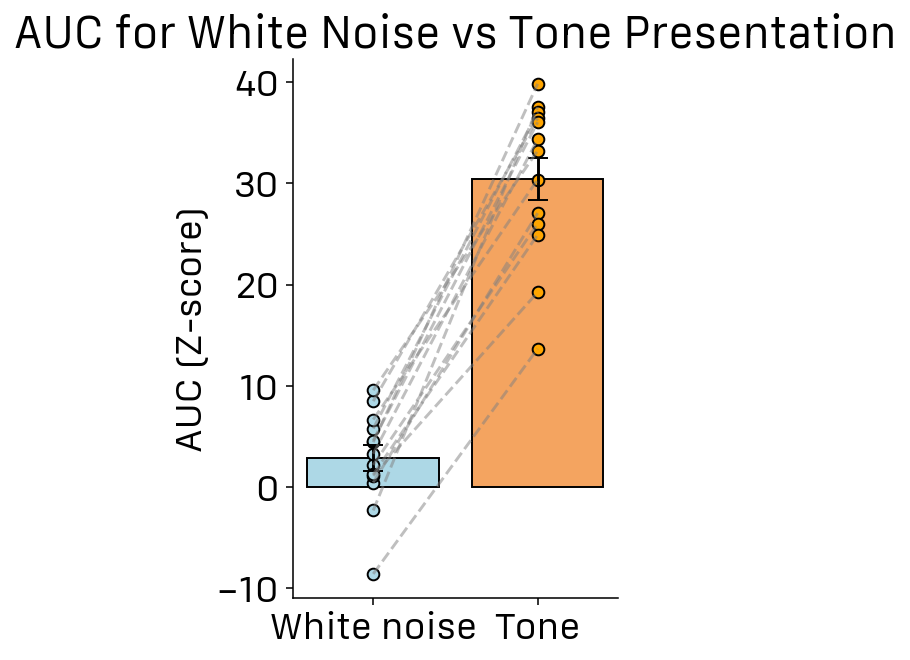

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.stats import ttest_rel  # For paired t-test

def auc_tone_wn(df, day):
    tone_auc_values = []
    wn_auc_values = []

    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter data for specific mouse, day, and tone/white noise presentation
        tone_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df['Tone'] == 1)].reset_index(drop=True)
        wn_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df['Wn'] == 1)].reset_index(drop=True)
        
        # Initialize lists for AUC values
        t_auc_values = []
        w_auc_values = []
        
        # Calculate AUC for each trial
        for trial in tone_data['trial'].unique():
            trial_data = tone_data[tone_data['trial'] == trial].reset_index(drop=True)
            auc = simpson(y=trial_data['Zscoreg'], x=trial_data['time_vector'])
            t_auc_values.append(auc)

        for trial in wn_data['trial'].unique():
            trial_data = wn_data[wn_data['trial'] == trial].reset_index(drop=True)
            auc = simpson(y=trial_data['Zscoreg'], x=trial_data['time_vector'])
            w_auc_values.append(auc)
        
        # Calculate average AUC for tone and white noise
        mt_average = np.mean(t_auc_values)
        mw_average = np.mean(w_auc_values)

        tone_auc_values.append(mt_average)
        wn_auc_values.append(mw_average)
    
    # Paired t-test
    t_stat, p_value = ttest_rel(tone_auc_values, wn_auc_values)
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    # Mean and SEM
    meantone = np.mean(tone_auc_values)
    meanwn = np.mean(wn_auc_values)
    semtone = np.std(tone_auc_values) / np.sqrt(len(tone_auc_values))
    semwn = np.std(wn_auc_values) / np.sqrt(len(wn_auc_values))

    # Plotting
    x = [0, 1]
    means = [meanwn, meantone]
    sems = [semwn, semtone]
    plt.figure(figsize = (3, 5))

    # Bar plot with error bars
    plt.bar(x, means, yerr=sems, capsize=5, width=0.8, color=['lightblue', 'sandybrown'], edgecolor='black', alpha=1, linewidth=1)
    plt.xticks(x, ['White noise', 'Tone'])
    plt.ylabel('AUC (Z-score)')
    plt.title('AUC for White Noise vs Tone Presentation')

    # Plot individual data points and connecting lines
    for i, (wn, tone) in enumerate(zip(wn_auc_values, tone_auc_values)):
        plt.plot([0, 1], [wn, tone], color='gray', linestyle='--', alpha=0.5)  # Line connecting each mouse's values
        plt.scatter([0], [wn], color='lightblue', alpha=1, edgecolor='black')
        plt.scatter([1], [tone], color='orange', alpha=1, edgecolor='black')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show the plot
    plt.show()

# Usage
auc_tone_wn(df, 'day2')


t-statistic: 10.67827023787018
p-value: 1.7545436470139704e-07


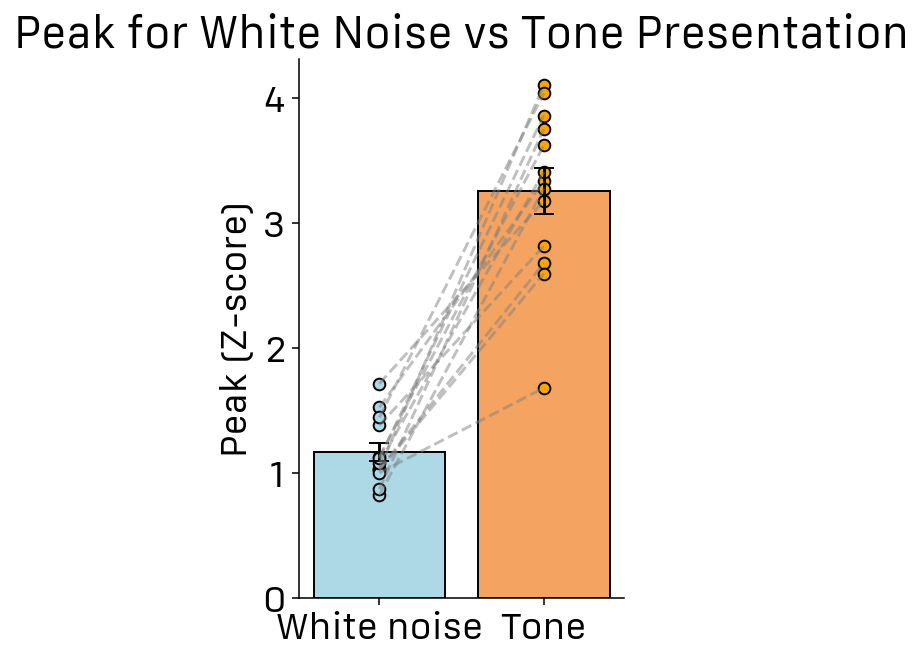

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson
from scipy.stats import ttest_rel  # For paired t-test

def peak_tone_wn(df, day):
    tone_peak_values = []
    wn_peak_values = []

    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter data for specific mouse, day, and tone/white noise presentation
        tone_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df['Tone'] == 1)].reset_index(drop=True)
        wn_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df['Wn'] == 1)].reset_index(drop=True)
        
        # Initialize lists for peak values
        t_peak_values = []
        w_peak_values = []
        
        # Calculate peak for each trial
        for trial in tone_data['trial'].unique():
            trial_data = tone_data[tone_data['trial'] == trial].reset_index(drop=True)
            peak = np.max(trial_data['Zscoreg'])
            t_peak_values.append(peak)

        for trial in wn_data['trial'].unique():
            trial_data = wn_data[wn_data['trial'] == trial].reset_index(drop=True)
            peak = np.max(trial_data['Zscoreg'])
            w_peak_values.append(peak)
        
        # Calculate average peak for tone and white noise
        mt_average = np.mean(t_peak_values)
        mw_average = np.mean(w_peak_values)

        tone_peak_values.append(mt_average)
        wn_peak_values.append(mw_average)
    
    # Paired t-test
    t_stat, p_value = ttest_rel(tone_peak_values, wn_peak_values)
    print(f"t-statistic: {t_stat}")
    print(f"p-value: {p_value}")

    # Mean and SEM
    meantone = np.mean(tone_peak_values)
    meanwn = np.mean(wn_peak_values)
    semtone = np.std(tone_peak_values) / np.sqrt(len(tone_peak_values))
    semwn = np.std(wn_peak_values) / np.sqrt(len(wn_peak_values))

    # Plotting
    x = [0, 1]
    means = [meanwn, meantone]
    sems = [semwn, semtone]
    plt.figure(figsize = (3, 5))

    # Bar plot with error bars
    plt.bar(x, means, yerr=sems, capsize=5, width=0.8, color=['lightblue', 'sandybrown'], edgecolor='black', alpha=1, linewidth=1)
    plt.xticks(x, ['White noise', 'Tone'])
    plt.ylabel('Peak (Z-score)')
    plt.title('Peak for White Noise vs Tone Presentation')

    # Plot individual data points and connecting lines
    for i, (wn, tone) in enumerate(zip(wn_peak_values, tone_peak_values)):
        plt.plot([0, 1], [wn, tone], color='gray', linestyle='--', alpha=0.5)  # Line connecting each mouse's values
        plt.scatter([0], [wn], color='lightblue', alpha=1, edgecolor='black')
        plt.scatter([1], [tone], color='orange', alpha=1, edgecolor='black')

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Show the plot
    plt.show()

# Usage
peak_tone_wn(df, 'day2')

In [21]:
# #### SINGLE TRIAL ANALYSIS 

# def plot_trials(df, trial_type_column):
#     # Loop through each mouse
#     for mouse in df['ID'].unique():
#         # Loop through each day
#         for day in df['day'].unique():
#             # Filter data for the specific mouse and day
#             mouse_data = df[(df['ID'] == mouse) & (df['day'] == day)].reset_index(drop=True)
            
#             # Loop through each unique trial type within the specific mouse and day
#             for trial_type in mouse_data[trial_type_column].unique():
#                 # Filter data for the specific trial type
#                 trial_type_data = mouse_data[mouse_data[trial_type_column] == trial_type].reset_index(drop=True)

#                 # Create a new figure for each unique combination of mouse, day, and trial type
#                 plt.figure(figsize=(10, 6))

#                 # Plot each trial within the trial type
#                 for trial in trial_type_data['trial'].unique():
#                     trial_data = trial_type_data[trial_type_data['trial'] == trial].reset_index(drop=True)

#                     # Plot Z-score signal for the trial
#                     plt.plot(trial_data['time_vector'], trial_data['Zscoreg'])
#                                         # Create a new DataFrame to hold the start and end times of freezing periods

#                     # Initialize freezing_periods list
#                     freezing_periods = []

#                     # Loop through the DataFrame to identify start and end of freezing
#                     for i in range(len(trial_data)):
#                         # Check for start of freezing
#                         if trial_data['Freezing'].iloc[i] == 1 and (i == 0 or trial_data['Freezing'].iloc[i - 1] == 0):
#                             start_time = trial_data['time_vector'].iloc[i]
                        
#                         # Check for end of freezing
#                         elif trial_data['Freezing'].iloc[i] == 0 and i > 0 and trial_data['Freezing'].iloc[i - 1] == 1:
#                             end_time = trial_data['time_vector'].iloc[i]
#                             freezing_periods.append((start_time, end_time))

#                     # After the loop, check if the last value is 1 for ongoing freezing
#                     if trial_data['Freezing'].iloc[-1] == 1:
#                         # Append the last start_time to the end of the trial
#                         end_time = trial_data['time_vector'].iloc[-1]  # Get the last time point
#                         freezing_periods.append((start_time, end_time))


#                     # Plotting with axvspan
#                     for start_time, end_time in freezing_periods:
#                         plt.axvspan(start_time, end_time, color='lightblue', alpha=0.5, label='Freezing')

#                     print(freezing_periods)
#                     print(trial_data.to_string())

                
#                     # Add labels, title, and legend for each plot
#                     plt.xlabel('Time (s)')
#                     plt.ylabel('Zscore')
#                     plt.title(f'Mouse {mouse}, Day {day}, Trial Type: {trial_type}, Trial: {trial}')
#                     plt.axvline(x=0, color='gray', linestyle='--', label='Onset')
#                     plt.legend()

#                     # Display the combined plot for each mouse, day, and trial type
#                     plt.show()

# # Example usage
# plot_trials(df, 'trial_type')

In [22]:
# for mice in df['ID'].unique():
#     for day in df['day'].unique():
#         for trial_type in df['trial_type'].unique():
            
           

In [23]:
df

,Unnamed: 0,Time,Zscoreg,Zscorer,Freezing,Tone,Wn,ID,sex,day,trial,trial_type,time_vector
0,6897,115.051341,0.487846,-0.470431,0.0,0,0,1052,f,day1,1.0,Wn,-5.000000
1,6898,115.068009,0.496047,-0.736025,0.0,0,0,1052,f,day1,1.0,Wn,-4.983333
2,6899,115.084677,0.503953,-0.396037,0.0,0,0,1052,f,day1,1.0,Wn,-4.966667
3,6900,115.101346,0.511551,0.021376,0.0,0,0,1052,f,day1,1.0,Wn,-4.950000
4,6901,115.118014,0.518833,-0.029376,0.0,0,0,1052,f,day1,1.0,Wn,-4.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
654283,108617,1810.649431,0.013081,1.033820,0.0,0,0,855,f,day1,6.0,Tone,29.933333
654284,108618,1810.666100,0.009974,1.073734,0.0,0,0,855,f,day1,6.0,Tone,29.950000
654285,108619,1810.682769,0.006566,1.052302,0.0,0,0,855,f,day1,6.0,Tone,29.966667
654286,108620,1810.699438,0.002808,1.053345,0.0,0,0,855,f,day1,6.0,Tone,29.983333


/var/folders/f5/1b9s96g507d8lm318wd11vrc0000gp/T/ipykernel_16595/2715849850.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(unique_mice))  # Using tab10 for up to 10 unique colors


Pearson correlation: -0.03, p-value: 0.8176


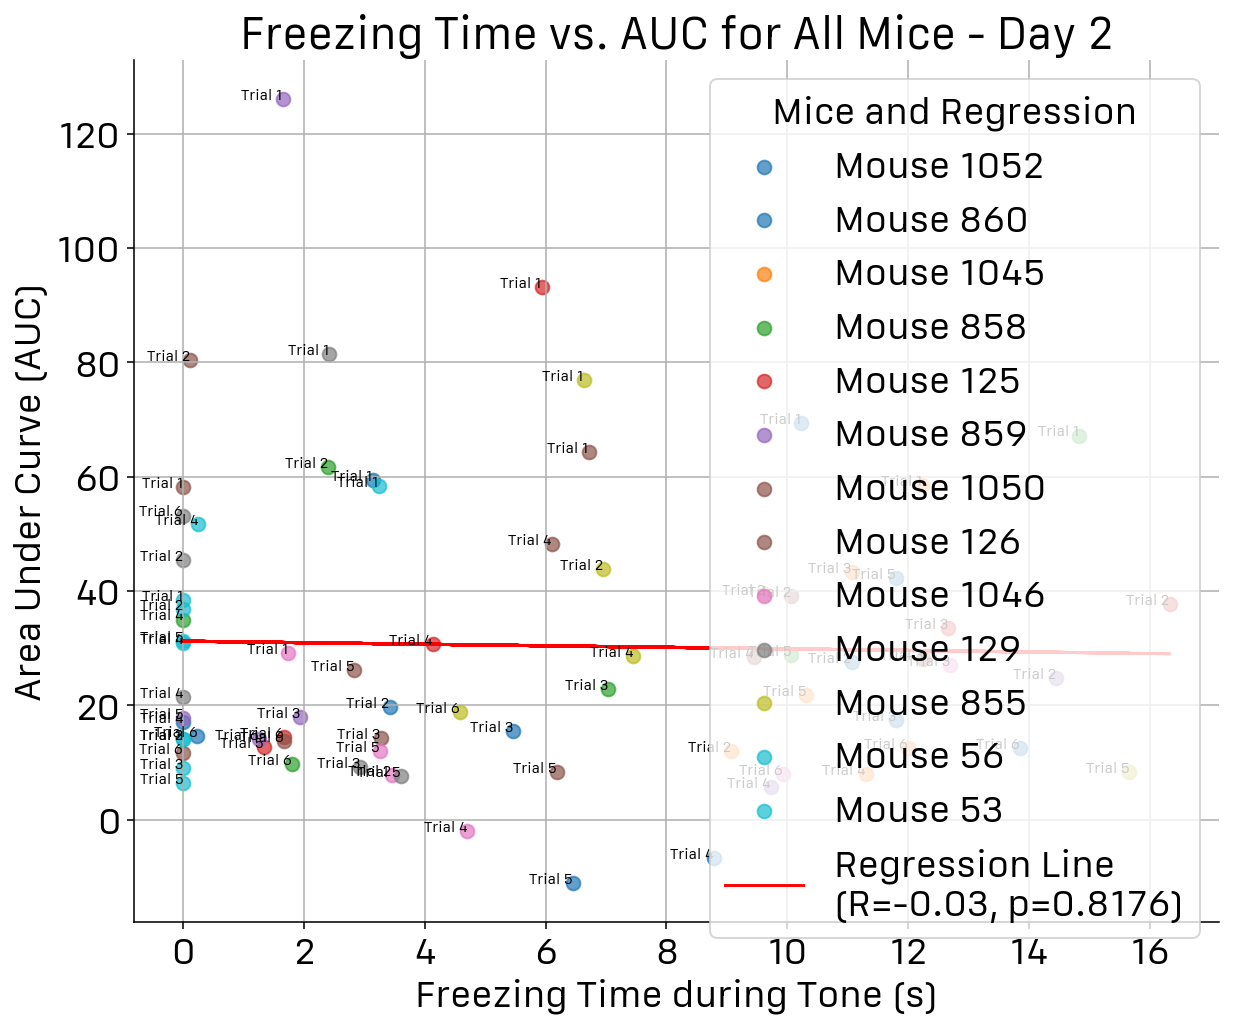

In [24]:
# df=df[df['ID']==858]
def plot_freezing_vs_auc(df, day, trial_type_column):
    # Create a color map for the different mice
    unique_mice = df['ID'].unique()
    colors = cm.get_cmap('tab10', len(unique_mice))  # Using tab10 for up to 10 unique colors
    
    plt.figure(figsize=(10, 8))
    
    all_freezing_times = []
    all_auc_values = []

    # Loop through each mouse
    for i, mouse in enumerate(unique_mice):
        # Filter data for specific mouse, day, and tone presentation
        tone_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df[trial_type_column] == 1)].reset_index(drop=True)
        
        # Initialize lists for freezing times and AUC values
        freezing_times = []
        auc_values = []
        
        # Loop through each trial for the mouse
        for trial in tone_data['trial'].unique():
            trial_data = tone_data[tone_data['trial'] == trial].reset_index(drop=True)
            
            # Calculate time spent freezing during tone presentation
            freezing_time = trial_data['Freezing'].sum() * (trial_data['time_vector'].iloc[1] - trial_data['time_vector'].iloc[0])
            freezing_times.append(freezing_time)
            
            # Calculate AUC for Z-score signal during tone presentation
            if len(trial_data) > 1:
                auc = simpson(y=trial_data['Zscoreg'], x=trial_data['time_vector'])
                auc_values.append(auc)
            else:
                auc_values.append(np.nan)
        
        # Append data to lists for overall correlation
        all_freezing_times.extend(freezing_times)
        all_auc_values.extend(auc_values)
        
        # Plot Freezing Time (x) vs. AUC (y) for this mouse
        plt.scatter(freezing_times, auc_values, color=colors(i), label=f'Mouse {mouse}', s=50, alpha=0.7)
        
        # Label each trial on the plot for this mouse
        for j, (x, y) in enumerate(zip(freezing_times, auc_values), start=1):
            if not np.isnan(x) and not np.isnan(y):  # Only label valid points
                plt.text(x, y, f'Trial {j}', fontsize=8, ha='right')

    # Calculate Pearson correlation and p-value
    all_freezing_times = np.array(all_freezing_times)
    all_auc_values = np.array(all_auc_values)
    valid_indices = ~np.isnan(all_freezing_times) & ~np.isnan(all_auc_values)
    
    correlation, p_value = pearsonr(all_freezing_times[valid_indices], all_auc_values[valid_indices])
    print(f"Pearson correlation: {correlation:.2f}, p-value: {p_value:.4f}")
    
    # Plot regression line
    if np.sum(valid_indices) > 1:  # Check for sufficient valid points
        slope, intercept = np.polyfit(all_freezing_times[valid_indices], all_auc_values[valid_indices], 1)
        regression_line = slope * all_freezing_times + intercept
        plt.plot(all_freezing_times, regression_line, color='red', label=f'Regression Line\n(R={correlation:.2f}, p={p_value:.4f})')

    # Set plot title and labels
    plt.title('Freezing Time vs. AUC for All Mice - Day 2')
    plt.xlabel('Freezing Time during Tone (s)')
    plt.ylabel('Area Under Curve (AUC)')
    plt.legend(title="Mice and Regression")
    plt.grid(True)
    plt.show()

# Call the function
plot_freezing_vs_auc(df, 'day2', 'Tone')



In [25]:
# ### Trial number vs AUC correlation

# def plot_freezing_vs_auc(df, day, trial_type_column):
#     # Create a color map for different mice
#     unique_mice = df['ID'].unique()
#     colors = cm.get_cmap('tab10', len(unique_mice))  # Using 'tab10' colormap

#     plt.figure(figsize=(8, 8))
    
#     # Initialize lists to store all data points for correlation
#     all_trial_numbers = []
#     all_auc_values = []

#     # Loop through each mouse
#     for i, mouse in enumerate(unique_mice):
#         # Filter data for specific mouse, day, and tone presentation
#         tone_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df[trial_type_column] == 1)].reset_index(drop=True)
        
#         # Initialize lists for freezing times and AUC values for each mouse
#         auc_values = []
#         trial_numbers = []
        
#         # Loop through each trial for the mouse
#         for trial in tone_data['trial'].unique():
#             trial_data = tone_data[tone_data['trial'] == trial].reset_index(drop=True)

#             #get trial number
#             trial_number = trial 
#             trial_numbers.append(trial_number)
            
#             # Calculate AUC for Z-score signal during tone presentation

#             auc = simpson(y=trial_data['Zscoreg'], x=trial_data['time_vector'])
#             auc_values.append(auc)

#         # Append to all data for correlation calculation
#         all_trial_numbers.extend(trial_numbers)
#         all_auc_values.extend(auc_values)

#         # Plot Freezing Time (x) vs. AUC (y) for this mouse
#         plt.scatter(trial_numbers, auc_values, color=colors(i), label=f'Mouse {mouse}', s=50, alpha=0.7)
        
#     # Calculate correlation only if there's valid data
#     if all_trial_numbers and all_auc_values:
#         valid_freezing = np.array(all_trial_numbers)
#         valid_auc = np.array(all_auc_values)
        
#         # Calculate Pearson correlation
#         corr, p_value = pearsonr(valid_freezing, valid_auc)
        
#         # Plot regression line
#         m, b = np.polyfit(valid_freezing, valid_auc, 1)
#         plt.plot(valid_freezing, m * valid_freezing + b, color='red', label=f'Fit line (r={corr:.2f}, p={p_value:.2e})')

#         # Set plot title and labels
#         plt.title('Trial Number AUC correlation')
#         plt.xlabel('Tone number')
#         plt.ylabel('Area Under Curve (Z-score)')
#         plt.legend(title="Mice")
#         # plt.grid(True)
#         plt.show()

# # Call the function
# plot_freezing_vs_auc(df, 'day2', 'Tone')



 r = r_value=-0.6206201892684241, p = p_value=2.2299014359883582e-09


trak NOT subset; don't know how to subset; dropped


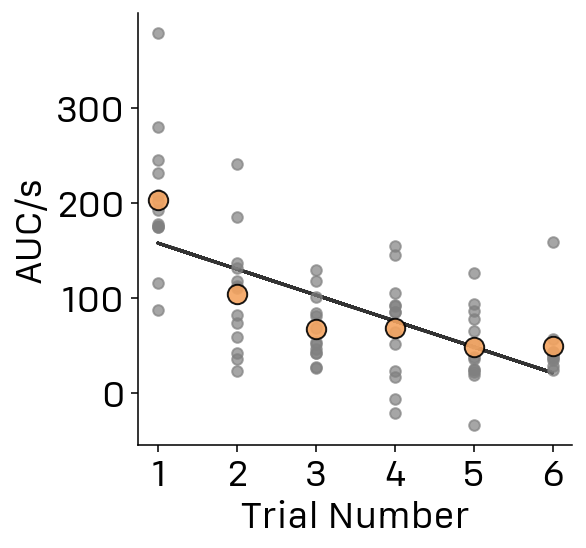

In [ ]:
### Trial number vs AUC correlation

def plot_freezing_vs_auc(df, day, trial_type_column):

    plt.figure(figsize=(4, 4))
    
    # Initialize lists to store all data points for correlation

    results = {'ID' : [], 'trialnum': [], 'AUC' : []}

    # Loop through each mouse
    for mouse in df['ID'].unique():
        # Filter data for specific mouse, day, and tone presentation
        tone_data = df[(df['ID'] == mouse) & (df['day'] == day) & (df[trial_type_column] == 1)].reset_index(drop=True)
        
        # Loop through each trial for the mouse
        for trial in tone_data['trial'].unique():
            trial_data = tone_data[tone_data['trial'] == trial].reset_index(drop=True)

            #get trial number
            auc = trial_data['Zscoreg'].sum()/len(trial_data['Zscoreg'])*60
            results['trialnum'].append(trial)
            results['AUC'].append(auc)
            results['ID'].append(mouse)

    results = pd.DataFrame(results)

    means = results.groupby('trialnum')['AUC'].mean()

    slope, intercept, r_value, p_value, std_err = linregress(results['trialnum'], results['AUC'])

    plt.plot(results['trialnum'], intercept + slope * results['trialnum'], color='black', alpha=0.8, zorder=0)
    plt.scatter(results['trialnum'], results['AUC'], alpha=0.7, color='gray', s=30)
    plt.scatter(means.index, means, alpha=0.9, color='sandybrown', edgecolor='black', s=100)

    plt.xlabel('Trial Number')
    plt.ylabel('AUC/s')
    plt.xticks(results['trialnum'].unique())

    
    print(f' r = {r_value=}, p = {p_value=}')
    # plt.savefig(f'/Users/ossamaghenissa/Desktop/CMRlabproject/fiberphotometry/ADFCFP/figures/AUCtrialnumber_{day}_{trial_type_column}.pdf', format='pdf')
    return results  


# Call the function
aucdf = plot_freezing_vs_auc(df, 'day2', 'Tone')

In [27]:
aucdf

,ID,trialnum,AUC
0,1052,1.0,4169.783298
1,1052,2.0,1656.693120
2,1052,3.0,1046.653813
3,1052,4.0,-407.379921
4,1052,5.0,2536.167744
...,...,...,...
71,53,1.0,2309.517546
72,53,2.0,844.942046
73,53,3.0,842.894833
74,53,4.0,3103.601739


/Users/ossamaghenissa/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) .SF Camera.
  fig.canvas.print_figure(bytes_io, **kw)


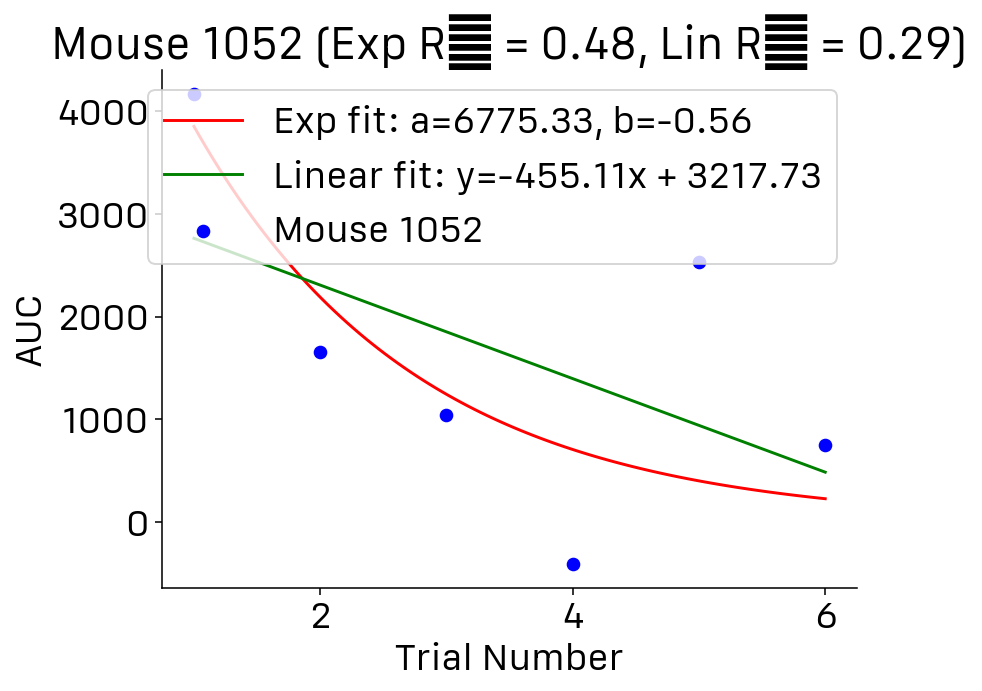

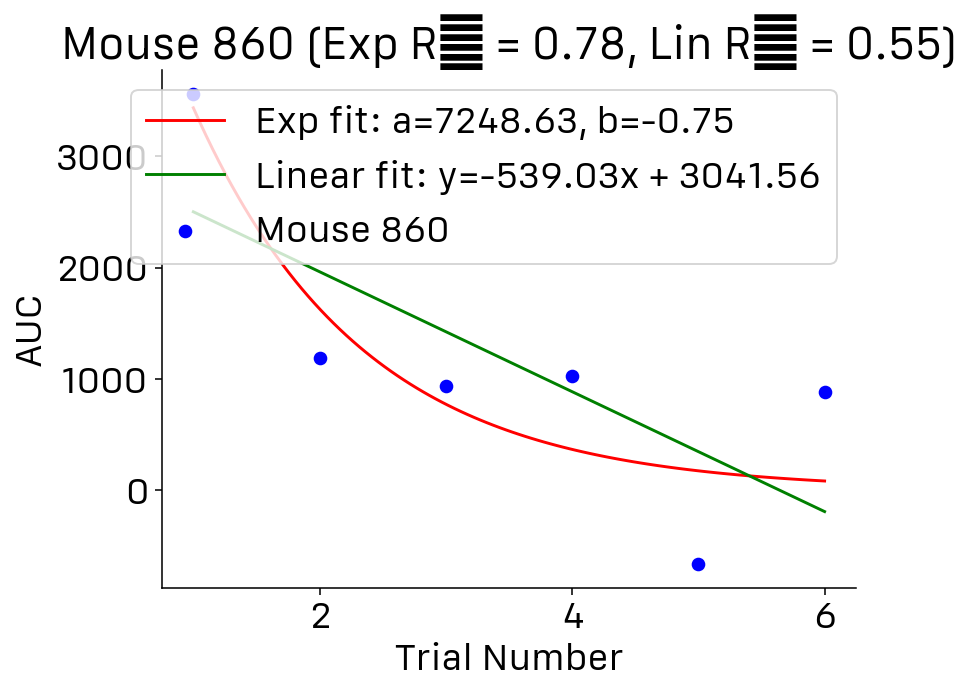

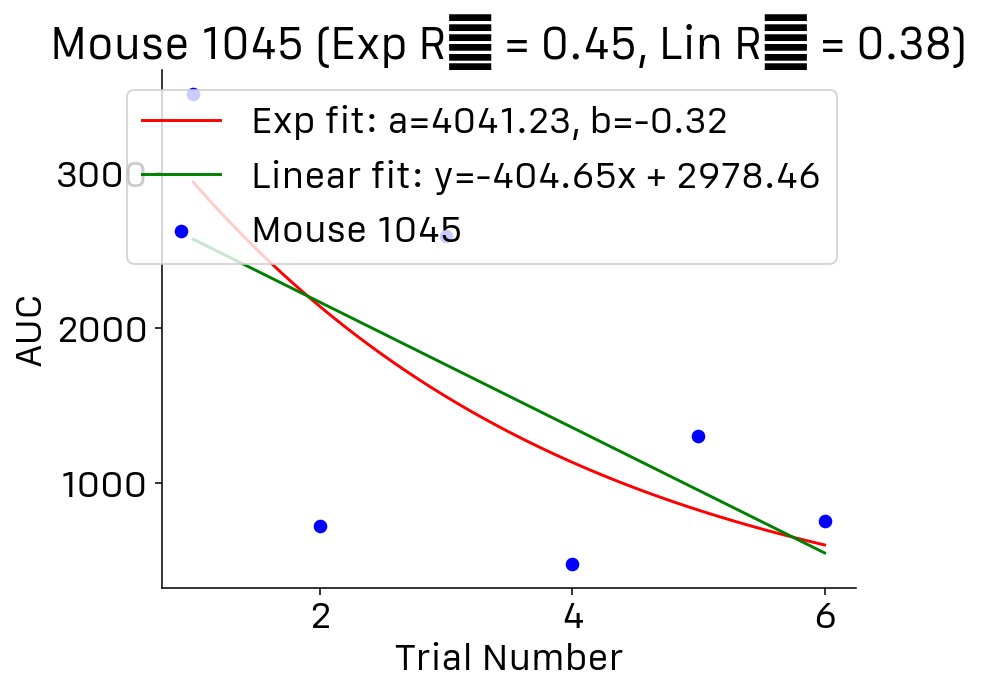

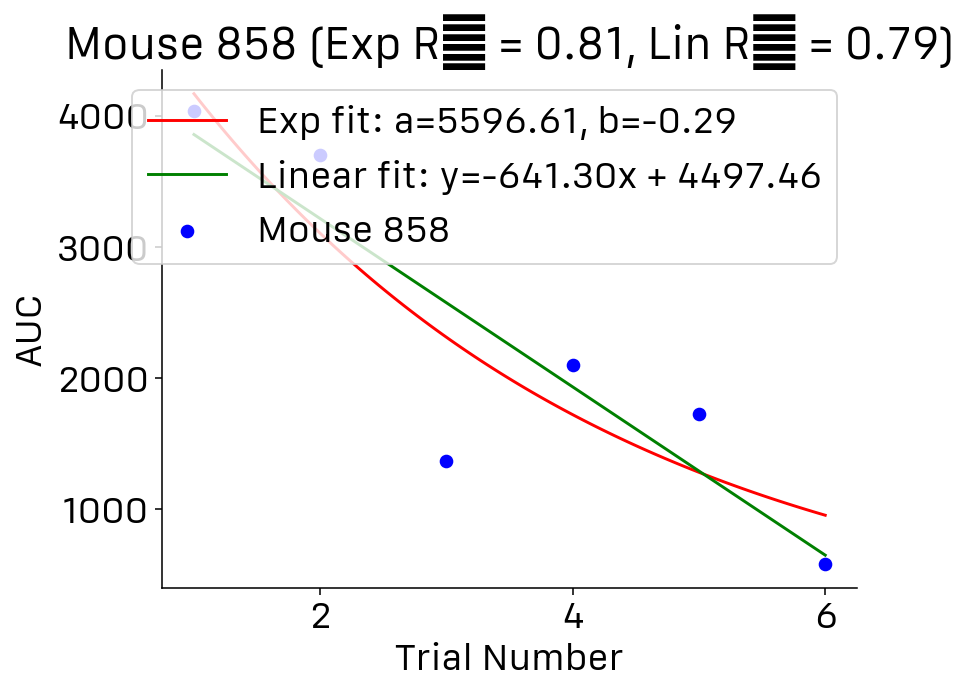

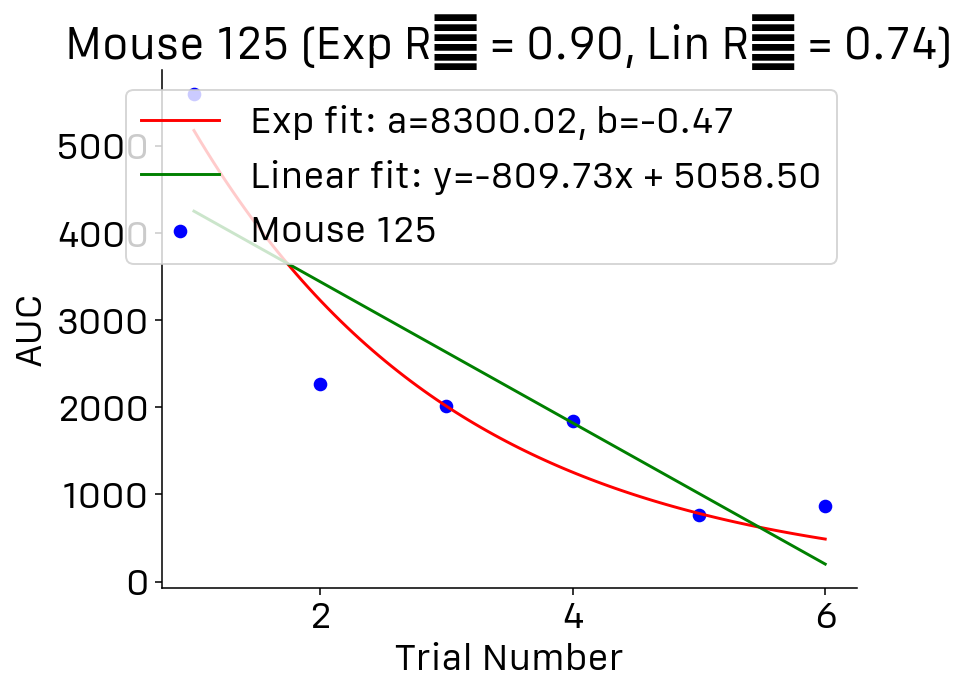

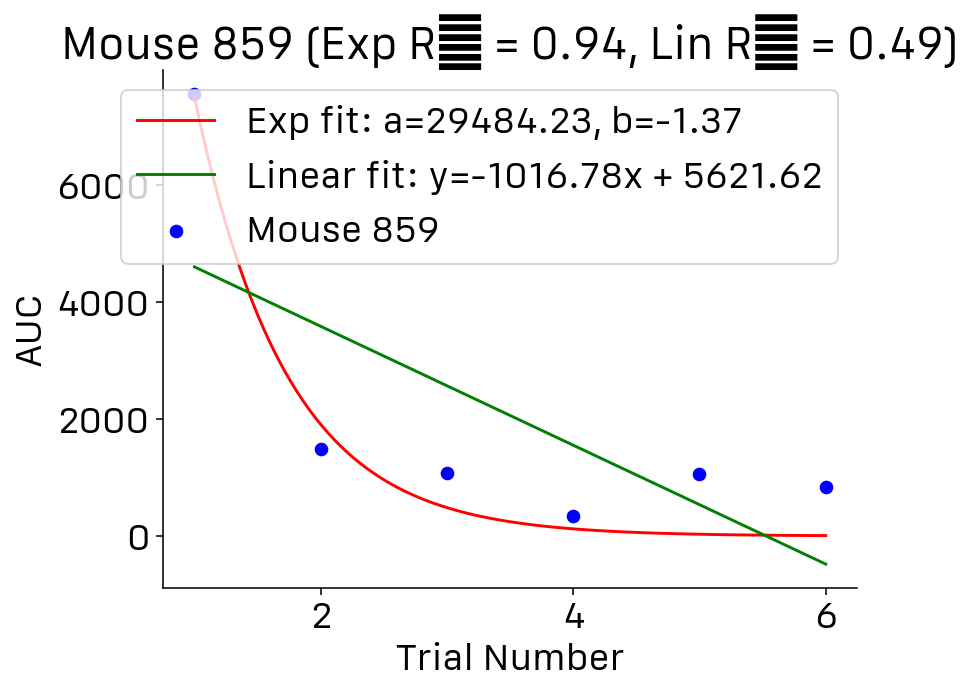

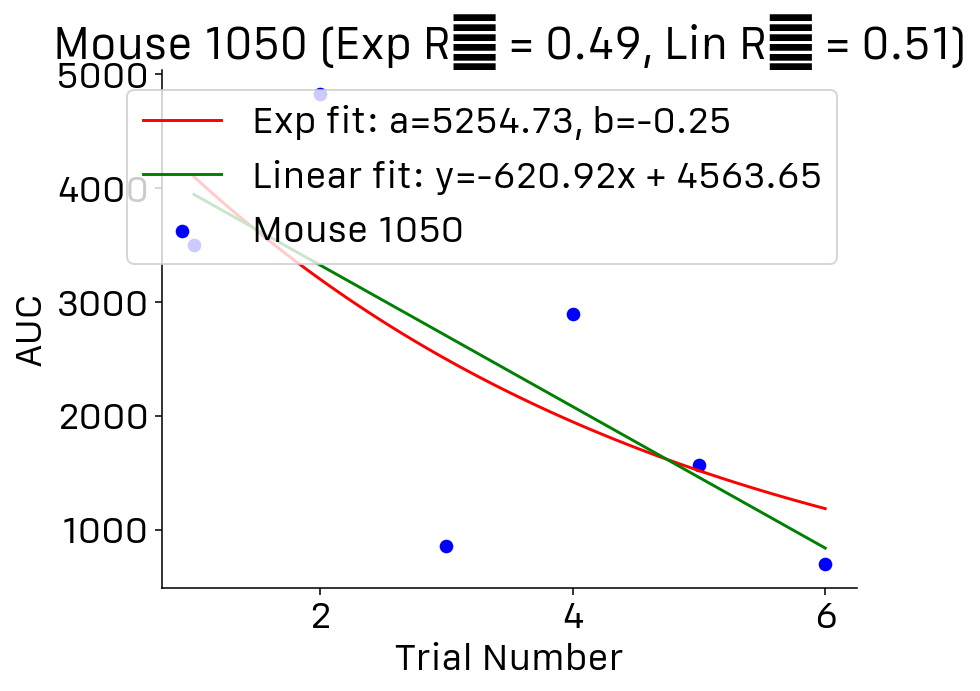

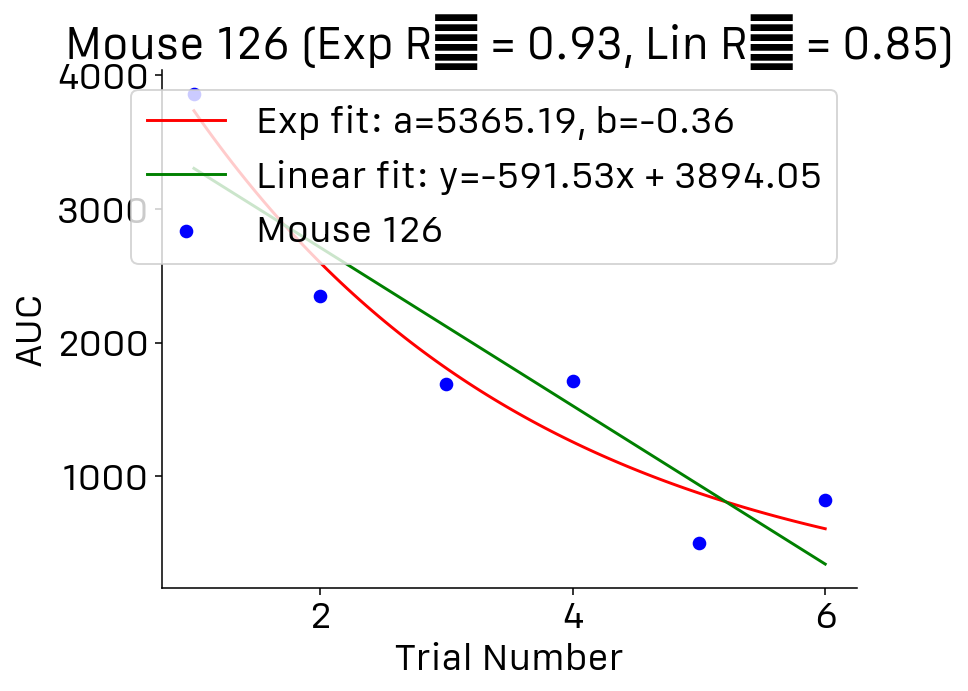

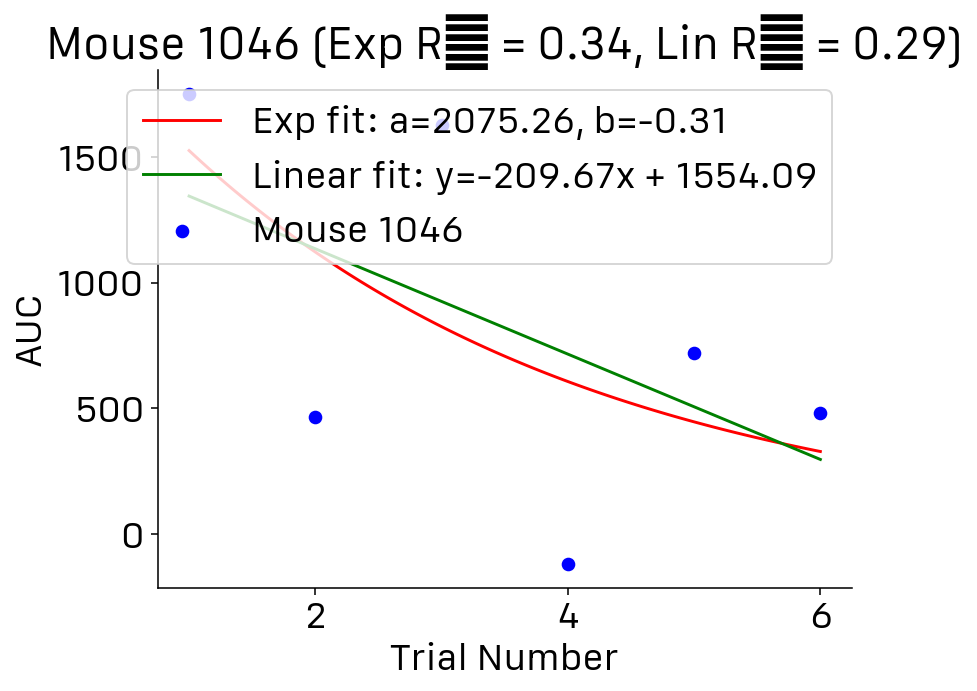

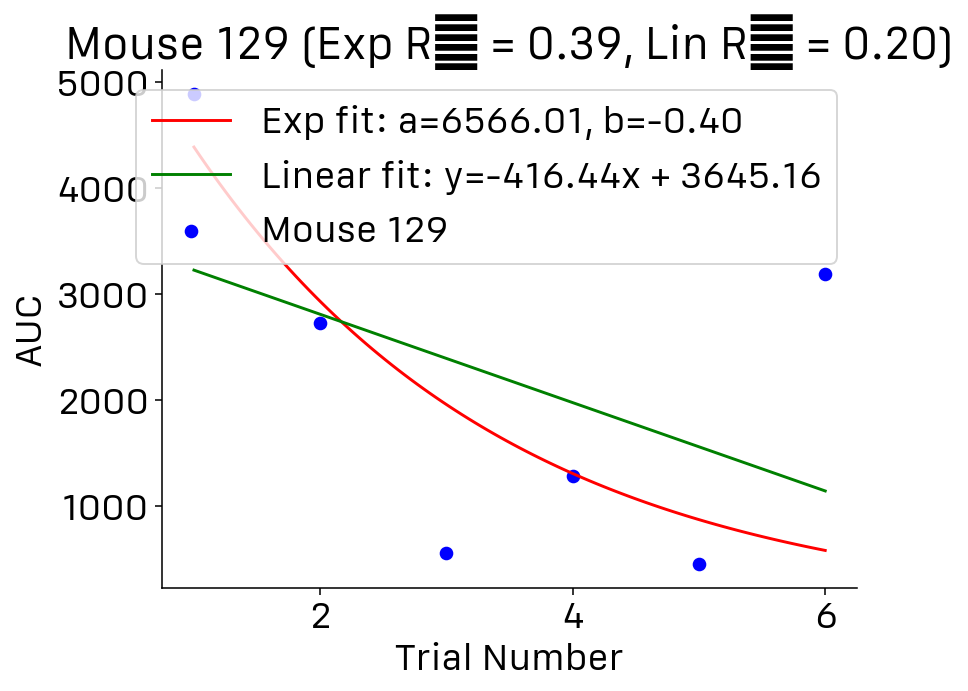

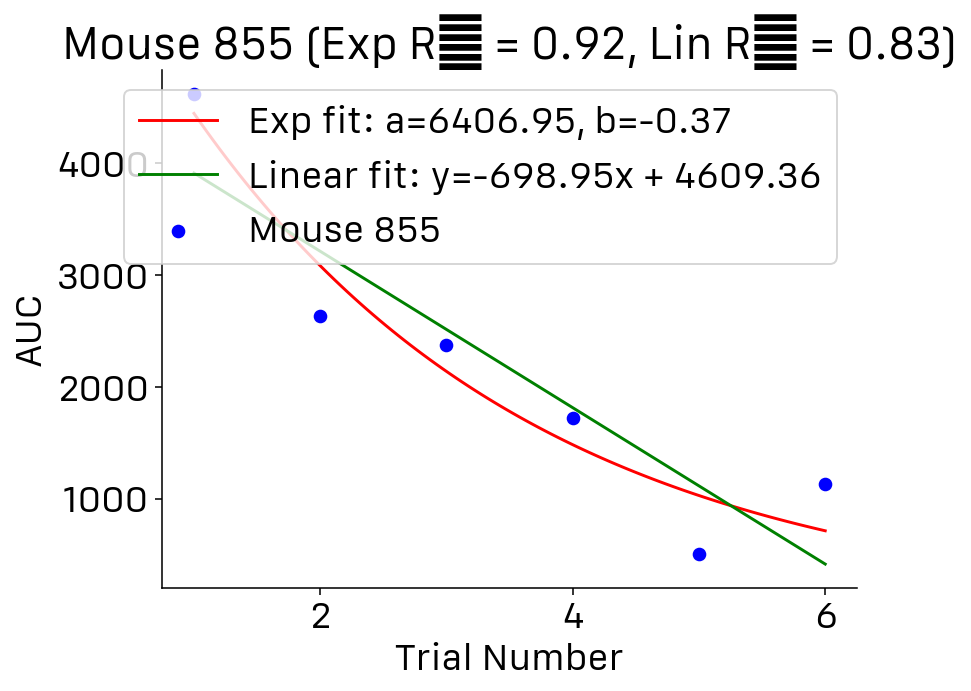

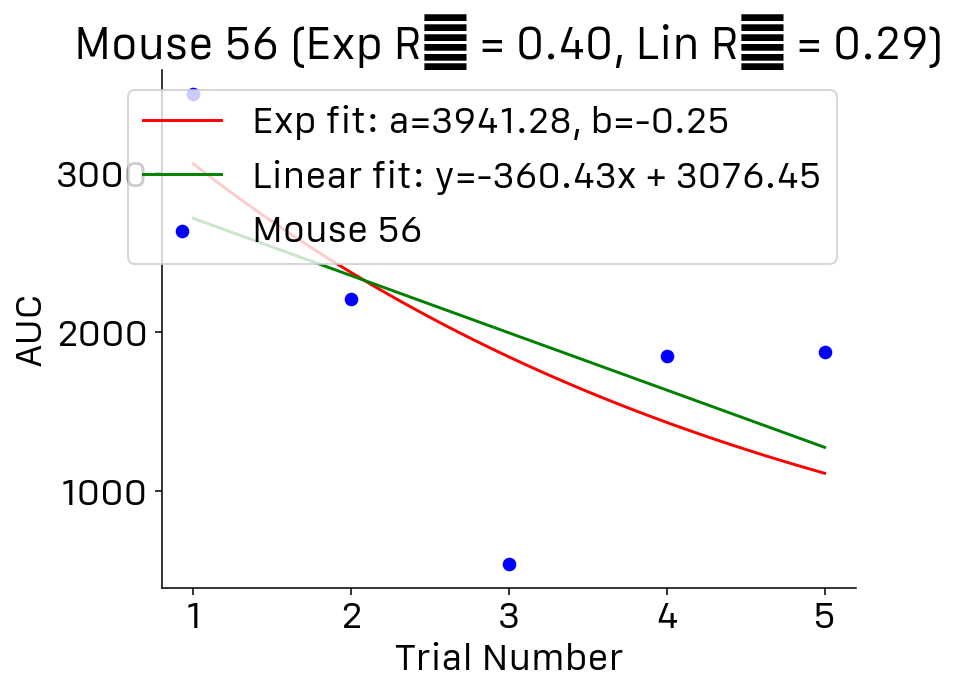

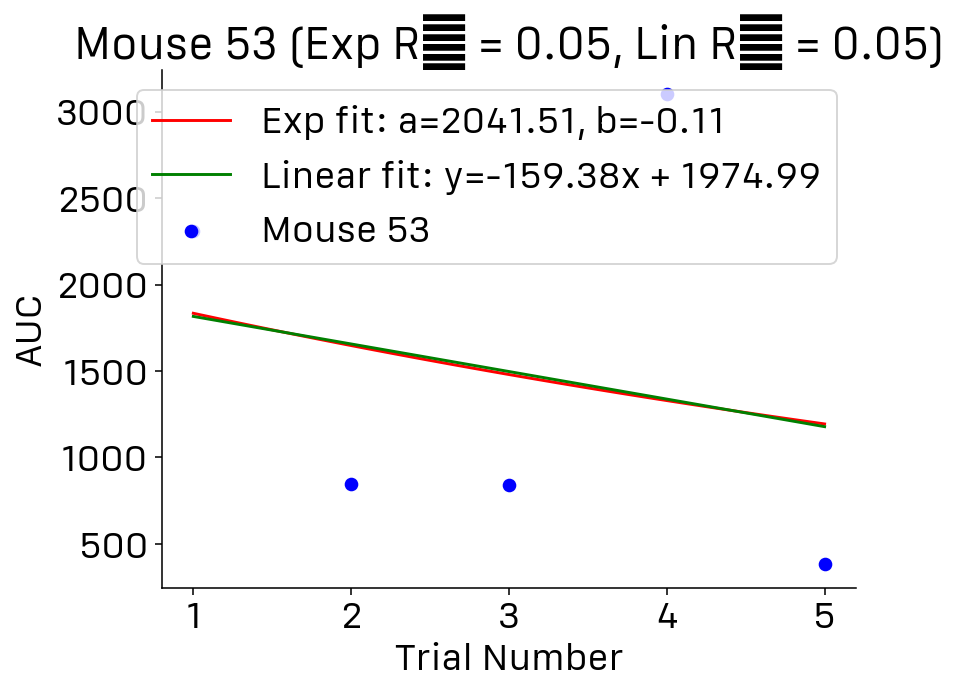

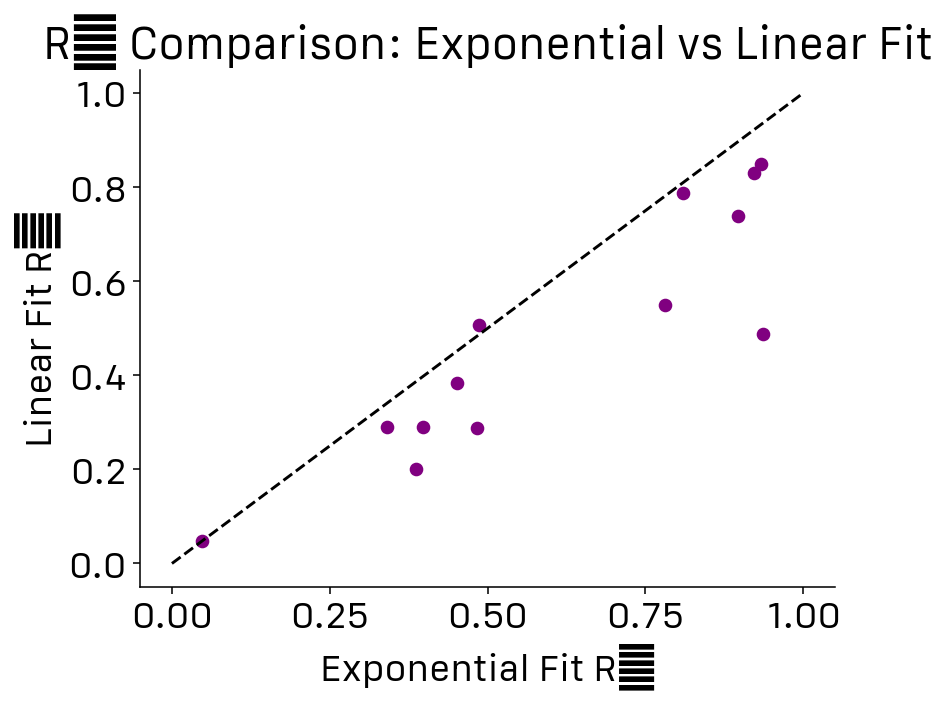

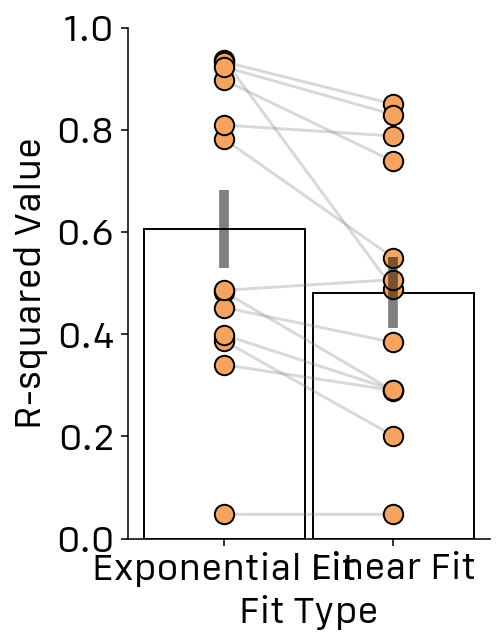

Paired t-test: t-statistic = 3.62, p-value = 0.0035


In [28]:
from scipy.stats import ttest_rel

exp_r_squared_values = []
lin_r_squared_values = []

for mice in aucdf['ID'].unique():
    mouse_aucdf = aucdf[aucdf['ID'] == mice]  # Create a copy for each mouse
    
    # Fit an exponential curve to the data
    def exp_func(x, a, b):
        return a * np.exp(b * x)

    # Initial guess for the parameters
    initial_guess = [1, 0.1]

    # Fit the exponential curve
    exp_params, exp_covariance = curve_fit(exp_func, mouse_aucdf['trialnum'], mouse_aucdf['AUC'], p0=initial_guess)

    # Generate x values for the fitted exponential curve
    x_fit = np.linspace(mouse_aucdf['trialnum'].min(), mouse_aucdf['trialnum'].max(), 100)
    y_exp_fit = exp_func(x_fit, *exp_params)

    # Calculate R-squared for exponential fit
    exp_residuals = mouse_aucdf['AUC'] - exp_func(mouse_aucdf['trialnum'], *exp_params)
    exp_ss_res = np.sum(exp_residuals**2)
    exp_ss_tot = np.sum((mouse_aucdf['AUC'] - np.mean(mouse_aucdf['AUC']))**2)
    exp_r_squared = 1 - (exp_ss_res / exp_ss_tot)
    exp_r_squared_values.append(exp_r_squared)

    # Fit a linear curve to the data
    lin_params = np.polyfit(mouse_aucdf['trialnum'], mouse_aucdf['AUC'], 1)
    y_lin_fit = np.polyval(lin_params, x_fit)

    # Calculate R-squared for linear fit
    lin_residuals = mouse_aucdf['AUC'] - np.polyval(lin_params, mouse_aucdf['trialnum'])
    lin_ss_res = np.sum(lin_residuals**2)
    lin_ss_tot = np.sum((mouse_aucdf['AUC'] - np.mean(mouse_aucdf['AUC']))**2)
    lin_r_squared = 1 - (lin_ss_res / lin_ss_tot)
    lin_r_squared_values.append(lin_r_squared)

    # Create a new figure for each mouse
    plt.figure()
    
    # Plot the fitted curves
    plt.plot(x_fit, y_exp_fit, label=f'Exp fit: a={exp_params[0]:.2f}, b={exp_params[1]:.2f}', color='red')
    plt.plot(x_fit, y_lin_fit, label=f'Linear fit: y={lin_params[0]:.2f}x + {lin_params[1]:.2f}', color='green')
    plt.scatter(mouse_aucdf['trialnum'], mouse_aucdf['AUC'], label=f'Mouse {mice}', color='blue')
    plt.xlabel('Trial Number')
    plt.ylabel('AUC')
    plt.legend()
    plt.title(f'Mouse {mice} (Exp R² = {exp_r_squared:.2f}, Lin R² = {lin_r_squared:.2f})')
    plt.show()

# Plot R-squared values for exponential vs linear fits
plt.figure()
plt.scatter(exp_r_squared_values, lin_r_squared_values, color='purple')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for reference
plt.xlabel('Exponential Fit R²')
plt.ylabel('Linear Fit R²')
plt.title('R² Comparison: Exponential vs Linear Fit')
plt.show()

# Plot R-squared values for exponential vs linear fits as a bar plot
conditions = ['Exponential Fit', 'Linear Fit']
means = [np.mean(exp_r_squared_values), np.mean(lin_r_squared_values)]
sems = [np.std(exp_r_squared_values) / np.sqrt(len(exp_r_squared_values)), np.std(lin_r_squared_values) / np.sqrt(len(lin_r_squared_values))]

plt.figure(figsize=(4, 5))
plt.bar(conditions, means, yerr=sems, color='none', edgecolor='black', capsize=0, width=0.95, error_kw=dict(lw=5, alpha=0.5, zorder=4), zorder=0)

# Plot individual R-squared values for each mouse
for exp_r2, lin_r2 in zip(exp_r_squared_values, lin_r_squared_values):
    plt.plot(conditions, [exp_r2, lin_r2], color='gray', alpha=0.3, zorder=0)
    plt.scatter(conditions, [exp_r2, lin_r2], color='sandybrown', edgecolor='black', s=100, zorder=3)

# Add labels and title
plt.ylabel('R-squared Value')
plt.xlabel('Fit Type')
ax = plt.gca()  # Get the current axis

plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Compute statistics on R-squared values
t_stat, p_value = ttest_rel(exp_r_squared_values, lin_r_squared_values)
print(f"Paired t-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")